# <center> Analiza parametara zagađenja vazduha - Indija 2015-2020<br><br>

Zagađenje vazduha podrazumeva prisustvo supstanci u atmosferi koje su štetne po zdravlje i/ili prouzrokuju štetne promene klime. Zagađivači vazduha mogu biti čestice, hemikalije i biološke materije. Osnovni parametri koji se mere pri analizi zagađenja vazduha su:<br><br>
<b>PM2.5</b> (ug/m3) - čestične materije (particulate matter – PM) koje imaju prečnik manji od 2.5 µm; štetne su po ljudsko zdravlje zbog svoje male veličine i mogućnosti da prodiru u pluća i krvotok; <b>PM10</b> - čestične materije, tzv. fine čestice, koje imaju prečnik veličine 10 µm; mogu se deponovati u organima: oksidi azota <b>NO<sub>x</sub></b>, od kojih su najpoznatiji: azot monoksid <b>NO</b>, azot dioksid <b>NO<sub>2</sub></b>, amonijak <b>NH<sub>3</sub></b>, ugljen momoksid <b>CO</b>, sumpor dioksid <b>SO<sub>2</sub></b> (ug/m3), ozon <b>O<sub>3</sub></b>, benzen <b>C<sub>6</sub>H<sub>6</sub></b>, toluen <b>C<sub>7</sub>H<sub>8</sub></b> i ksilen <b>C<sub>8</sub>H<sub>10</sub></b>.<br>
<b>Indeks kvaliteta vazduha</b> (eng. Air Quality Index, <b>AQI</b>) je parametar koji se koristi za opisivanje i ocenjivanje zagađenosti vazduha.<br><br>
Podaci za analizu preuzeti su sa https://www.kaggle.com/rohanrao/air-quality-data-in-india, a odnose se na parametre zagađenosti vazduha merene u 26 velikih indijskih gradova u periodu od 2015. do polovine 2020. godine.

In [147]:
#importovanje potrebnih library-ja i modula ii podešavanje broja decimalnih mesta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
pd.set_option("display.precision", 2)

In [148]:
#učitavanje podataka u Pandas DF i prikaz početka fajla sa definisanim brojem redova
df = pd.read_csv('India_city_day.csv')
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [203]:
#prikaz podataka sa kraja fajla
df.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020,06
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020,06
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020,06
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020,06
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good,2020,07


In [134]:
#prikaz broja redova i kolona
df.shape

(29531, 16)

In [135]:
#štampanje osnovnih informacija o DataFrame-u
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [136]:
#štampanje naziva kolona
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [137]:
#prikaz osnovnih statističkih karakteristika svake kolone: 
#broj non-missing vrednosti, srednja vrednost (mean), 
#standardna devijacija, minimum, medijanu, 0.25 i 0.75 kvartile i maksimum.
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.00,18391.00,25949.00,25946.00,25346.00,19203.00,27472.00,25677.00,25509.00,23908.00,21490.00,11422.00,24850.00
mean,67.45,118.13,17.57,28.56,32.31,23.48,2.25,14.53,34.49,3.28,8.70,3.07,166.46
std,64.66,90.61,22.79,24.47,31.65,25.68,6.96,18.13,21.69,15.81,19.97,6.32,140.70
min,0.04,0.01,0.02,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,13.00
25%,28.82,56.25,5.63,11.75,12.82,8.58,0.51,5.67,18.86,0.12,0.60,0.14,81.00
50%,48.57,95.68,9.89,21.69,23.52,15.85,0.89,9.16,30.84,1.07,2.97,0.98,118.00
75%,80.59,149.75,19.95,37.62,40.13,30.02,1.45,15.22,45.57,3.08,9.15,3.35,208.00
max,949.99,1000.00,390.68,362.21,467.63,352.89,175.81,193.86,257.73,455.03,454.85,170.37,2049.00


In [138]:
#prikaz statistika za nenumeričke kolone
df.describe(include=['object', 'bool'])

,City,Date,AQI_Bucket
count,29531,29531,24850
unique,26,2009,6
top,Chennai,2020-04-05,Moderate
freq,2009,26,8829


In [139]:
#prebrojavanje svake vrednosti u slučaju kategoričkih podataka (type object)
df['City'].value_counts()

Chennai               2009
Bengaluru             2009
Lucknow               2009
Mumbai                2009
Ahmedabad             2009
Delhi                 2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: City, dtype: int64

In [140]:
#prebrojavanje svake vrednosti u slučaju kategoričkih podataka (type object)
df['AQI_Bucket'].value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

In [141]:
# prikaz svih redova koji sadrže NaN vrednosti
df[df.isnull().any(axis=1)].head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [146]:
# prikaz svih redova koji ne sadrze NaN vrednosti
df[df.notnull().all(axis=1)].head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [143]:
#sortiranje vrednosti po više kolona
df.sort_values(by=['City', 'Date'], ascending=[True, False]).head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2008,Ahmedabad,2020-07-01,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
2007,Ahmedabad,2020-06-30,40.02,121.10,7.09,58.92,33.41,NaN,0.73,16.39,41.64,1.21,44.10,1.35,98.0,Satisfactory
2006,Ahmedabad,2020-06-29,29.75,127.98,9.06,25.15,18.92,NaN,0.67,12.10,34.99,1.39,60.21,0.79,74.0,Satisfactory
2005,Ahmedabad,2020-06-28,31.57,NaN,6.37,23.99,16.40,NaN,0.52,11.01,26.34,1.37,49.58,1.34,82.0,Satisfactory
2004,Ahmedabad,2020-06-27,62.12,118.67,9.18,56.35,19.86,NaN,0.49,12.44,68.05,1.32,37.76,1.62,92.0,Satisfactory
2003,Ahmedabad,2020-06-26,36.48,150.65,8.96,30.78,20.80,NaN,0.59,10.41,44.47,1.76,49.31,1.72,93.0,Satisfactory
2002,Ahmedabad,2020-06-25,32.56,142.43,8.29,24.83,18.21,NaN,0.65,11.73,40.54,0.98,51.94,1.22,95.0,Satisfactory
2001,Ahmedabad,2020-06-24,30.29,NaN,13.07,25.92,21.72,NaN,0.75,11.99,43.31,1.95,55.13,1.19,91.0,Satisfactory
2000,Ahmedabad,2020-06-23,22.20,88.99,7.13,15.67,12.20,NaN,0.51,13.00,64.75,3.18,60.90,2.46,85.0,Satisfactory
1999,Ahmedabad,2020-06-22,19.02,98.37,4.48,16.76,11.49,NaN,0.52,13.32,45.85,3.33,53.61,2.67,75.0,Satisfactory


In [144]:
#filtriranje
df[(df['City'] == 'Mumbai') & (df['PM10']>60)& (df['PM2.5']>40)].head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
23150,Mumbai,2018-07-19,46.76,73.60,4.55,14.70,19.23,NaN,1.20,9.71,24.56,0.72,NaN,NaN,82.0,Satisfactory
23176,Mumbai,2018-08-14,80.13,64.24,15.43,20.85,36.28,NaN,0.91,11.77,39.50,0.33,NaN,NaN,107.0,Moderate
23214,Mumbai,2018-09-21,42.73,114.46,38.25,28.18,66.41,NaN,1.92,14.14,43.70,1.41,NaN,NaN,113.0,Moderate
23221,Mumbai,2018-09-28,44.86,107.68,51.26,37.40,88.20,NaN,2.00,15.19,50.39,2.15,NaN,NaN,108.0,Moderate
23222,Mumbai,2018-09-29,44.05,112.39,41.92,31.84,73.78,NaN,1.94,17.12,47.98,1.42,NaN,NaN,106.0,Moderate


In [145]:
df[(df['City'] == 'Mumbai') & (df['PM10']>60)& (df['PM2.5']>40)]['City'].value_counts()

Mumbai    265
Name: City, dtype: int64

### <center> Mesečni pregled srednjih vrednosti pojedinačnih parametara <br>zagađenja vazduha po gradovima za 2019. i 2020. godinu



In [153]:
#Pravljenje novih kolona radi filtriranja (na osnovu kolone Date)
    
df['year']=df['Date'].str[0:4]
df['month']=df['Date'].str[5:7]

In [113]:
#lista svih gradova
cities_all = df['City'].unique().tolist()

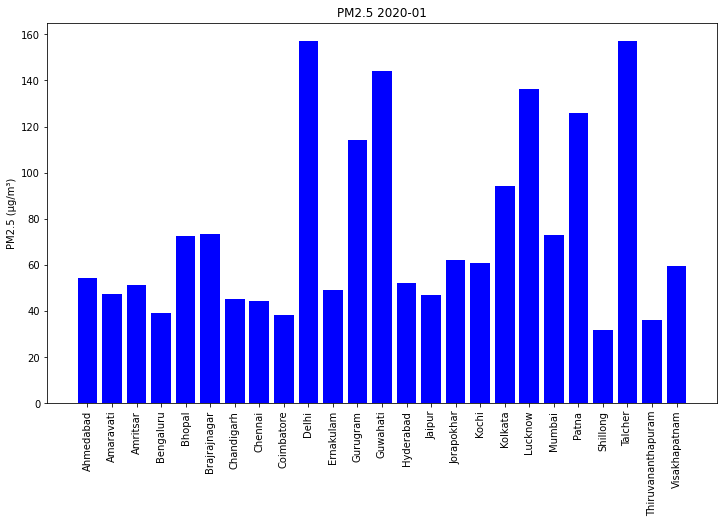

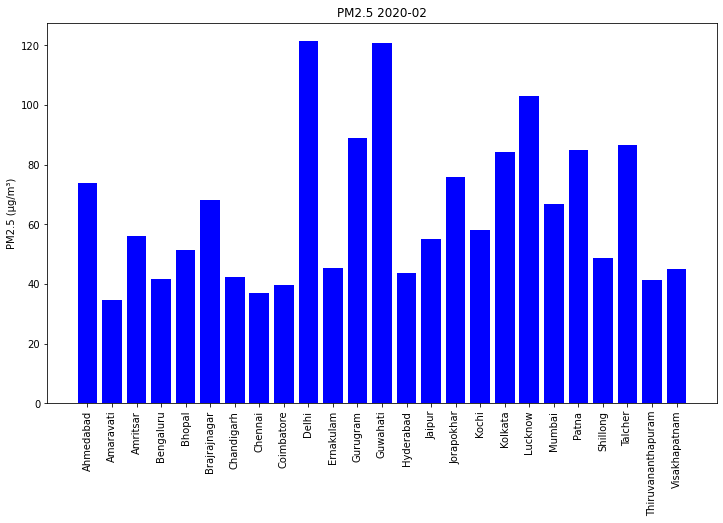

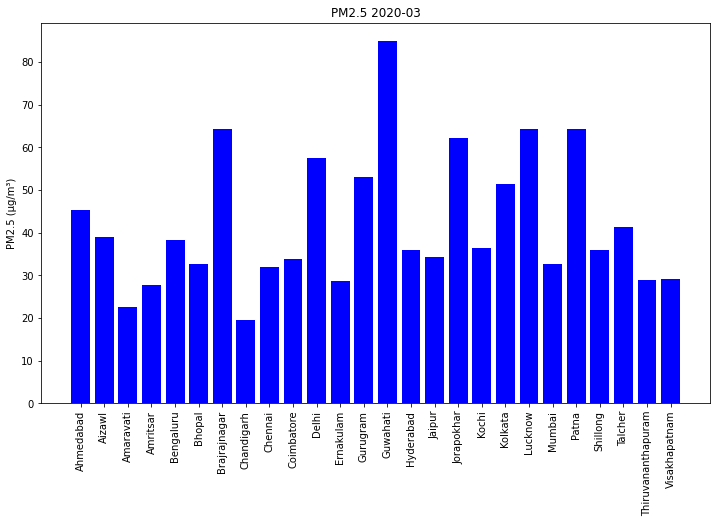

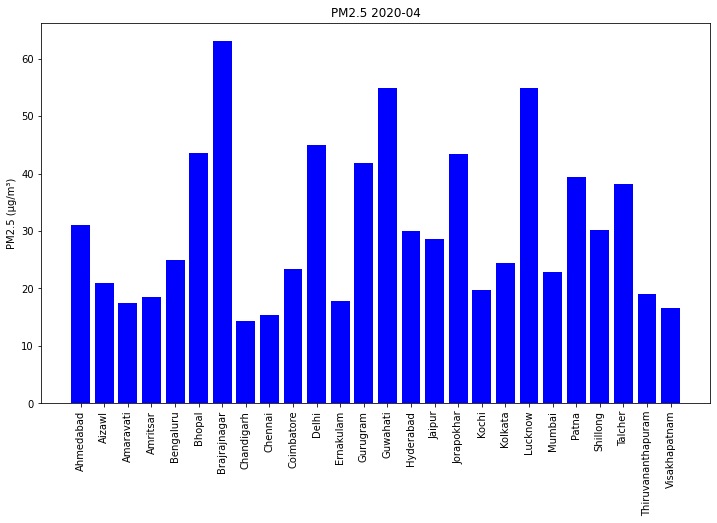

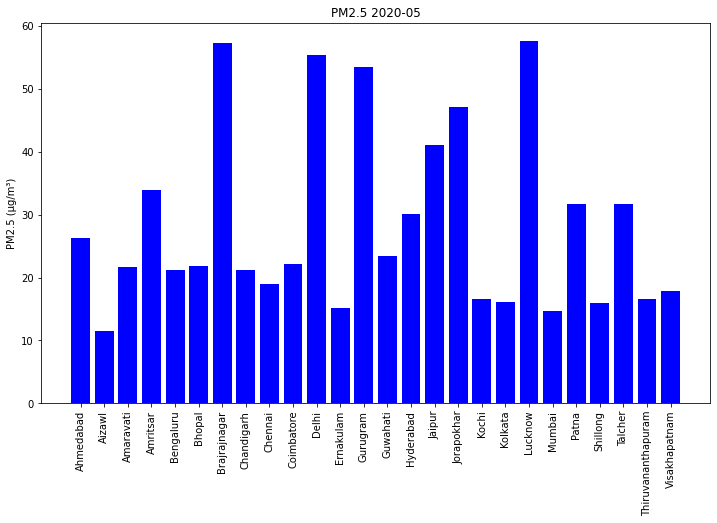

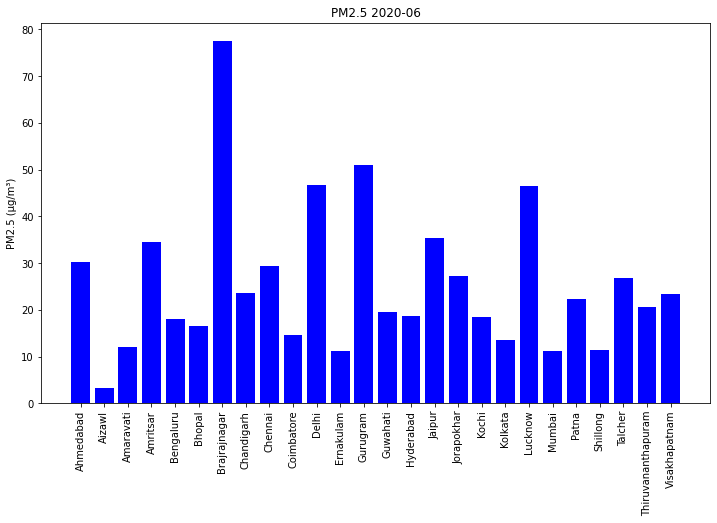

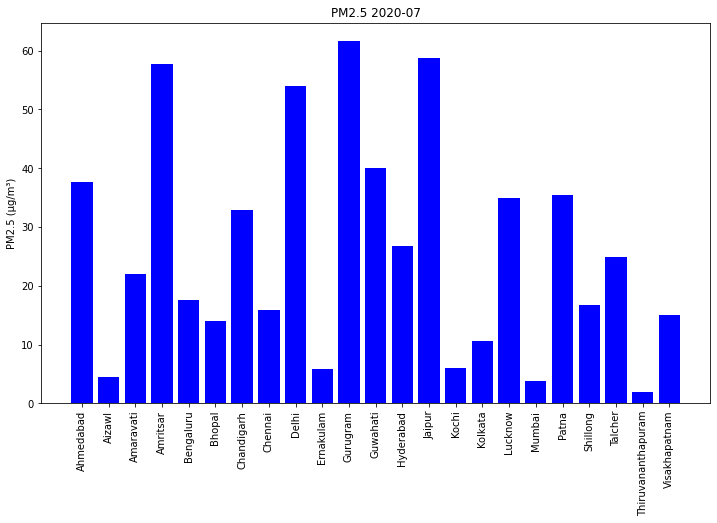

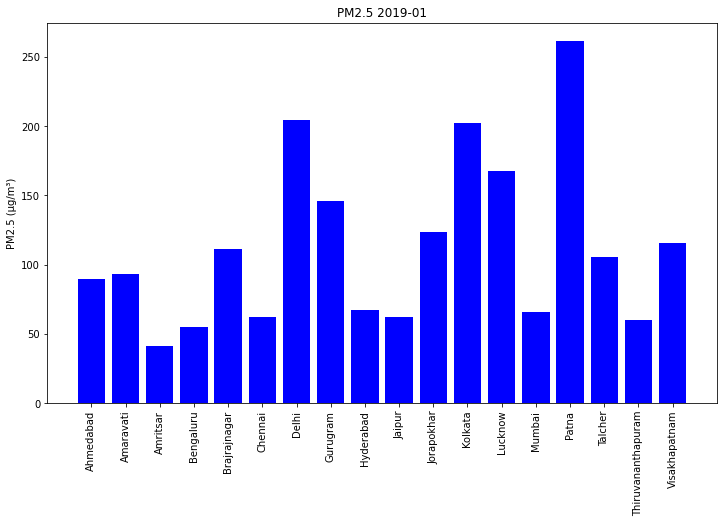

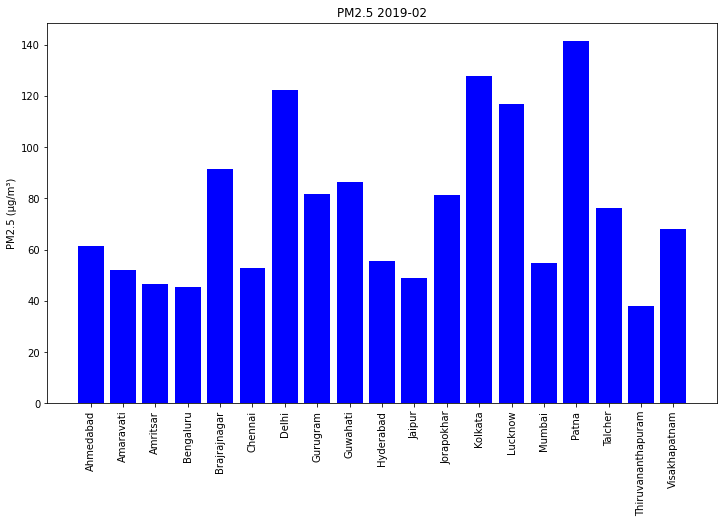

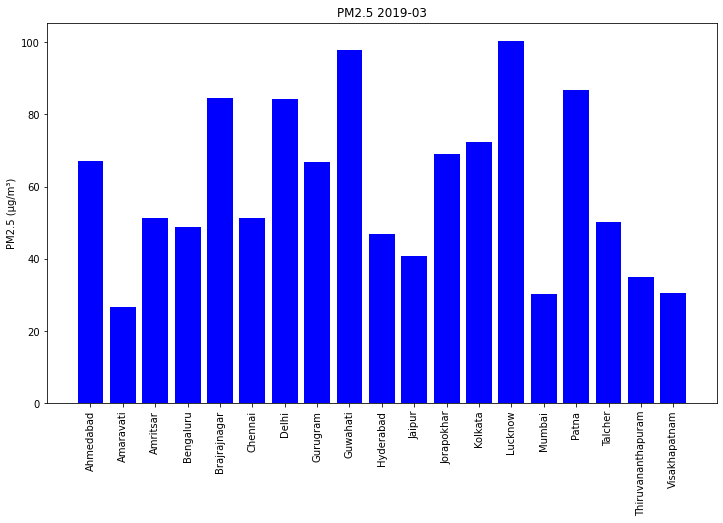

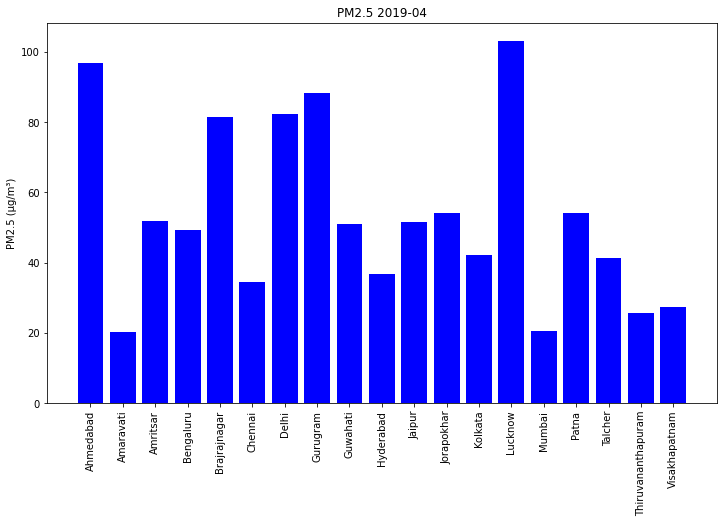

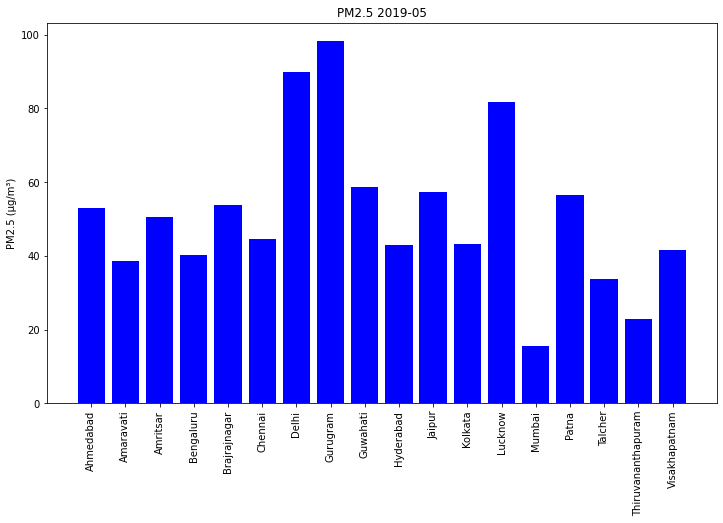

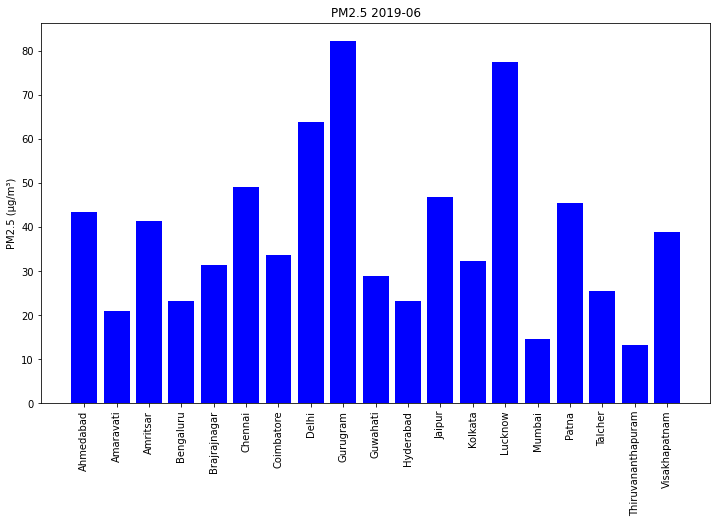

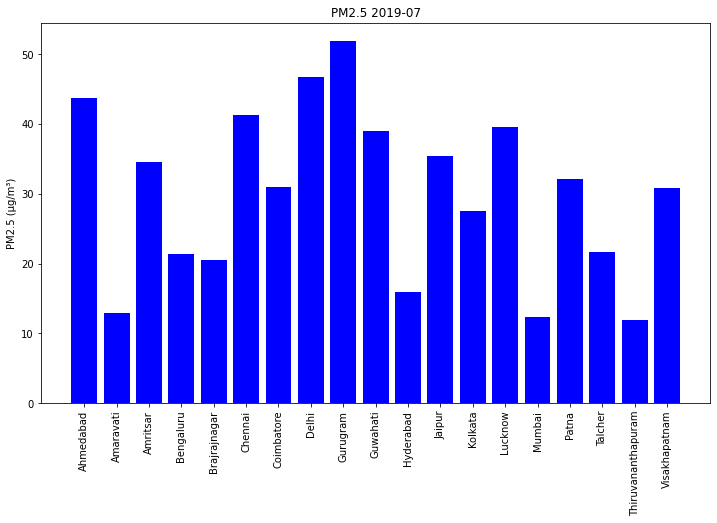

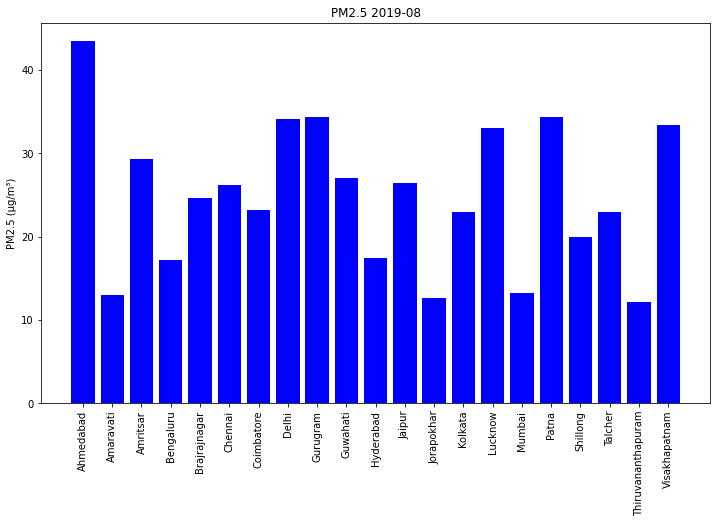

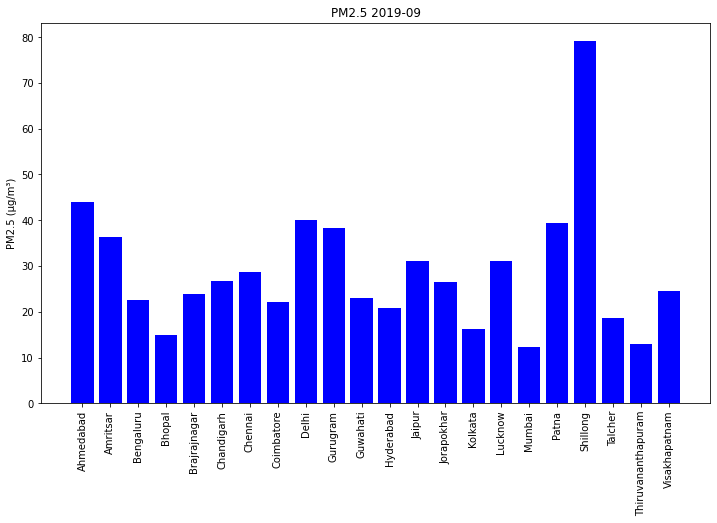

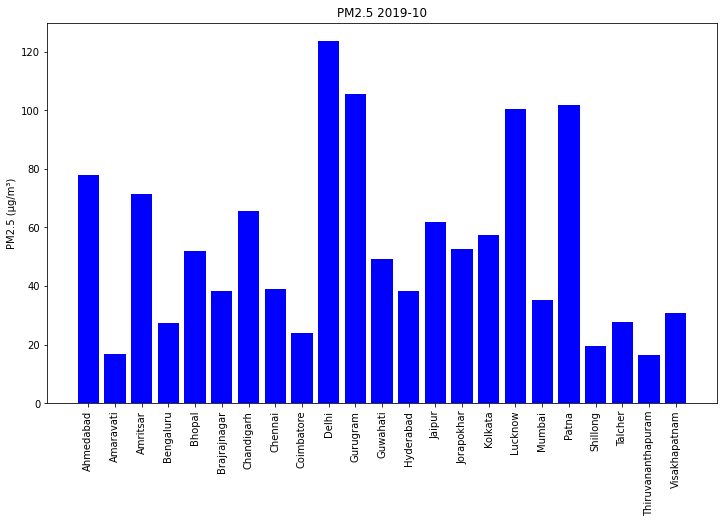

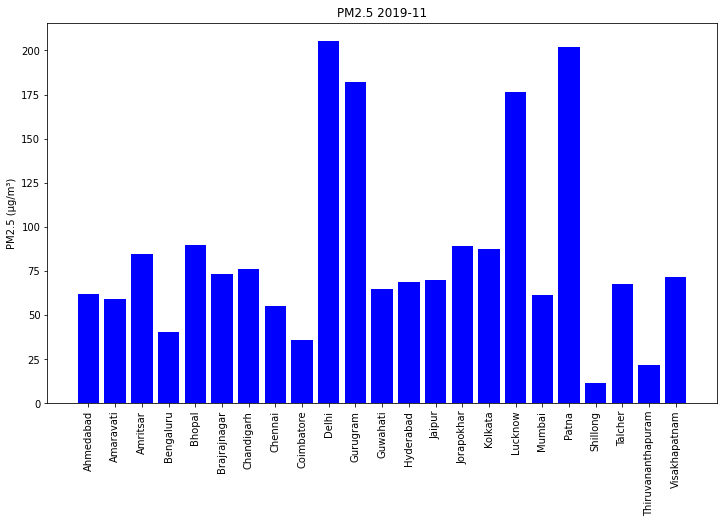

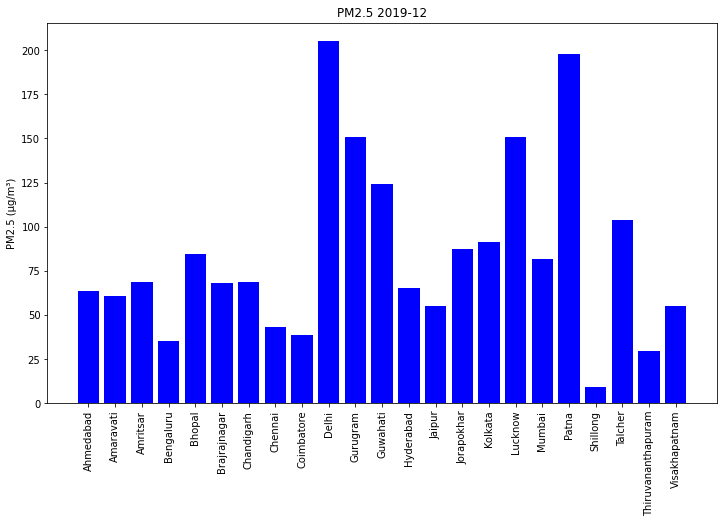

In [172]:
#definisanje lista godina i meseci
years = ['2020','2019']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

#dimenzije dijagrama
plt.rcParams['figure.figsize'] = [12, 7]

#filtriranje po godini, mesecu gradu i parametru i crtanje bar grafikona
for i in range(len(years)):
    year = years[i]  
    
    for j in range(len(months)):
        month = months[j]        
    
        filter1 = df[(df['year'] == year) & (df['month'] == month) & (df['PM2.5'] >0)]
        cities = filter1['City'].unique().tolist()
        values = []
        
        for k in range(len(cities)):
            city = cities[k]
            filter2 = filter1[(filter1['City'] == city)]
            filter3 = filter2['PM2.5'].agg([np.mean])
            lista = filter3.tolist()  
            
            #lista = filter1[(filter1['City'] == city)]['PM2.5'].agg([np.mean]).tolist()

            values.extend(lista)
         
        if len(values)>0: 
            plt.title('PM2.5 ' + year + '-' + month)
            plt.xticks(rotation=90)
            plt.bar(cities,values,label="Mean",color="b")
            plt.ylabel("PM2.5 (µg/m³)") # oznacavamo y labelu
            plt.show()


### <center>Pregled srednjih vrednosti pojedinačnog parametra za pojedinačne gradove po mesecima u godini

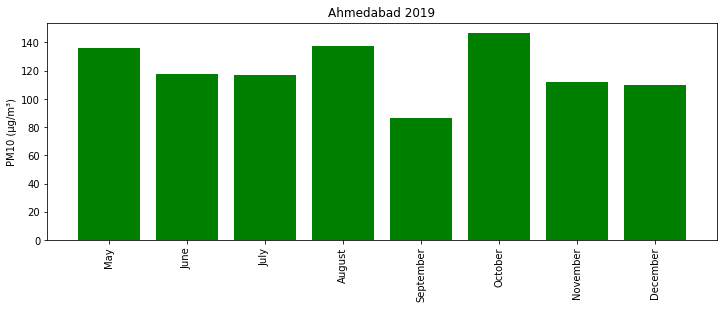

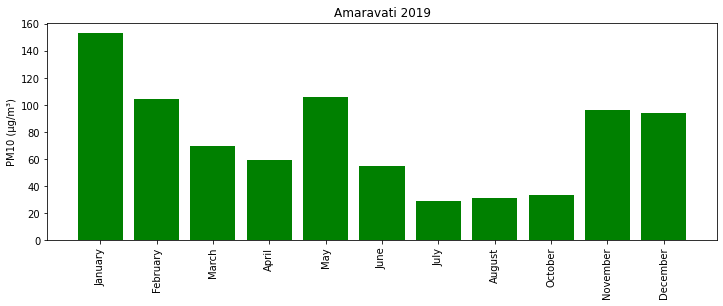

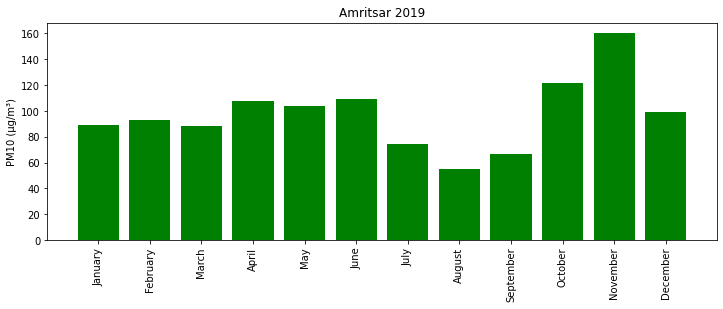

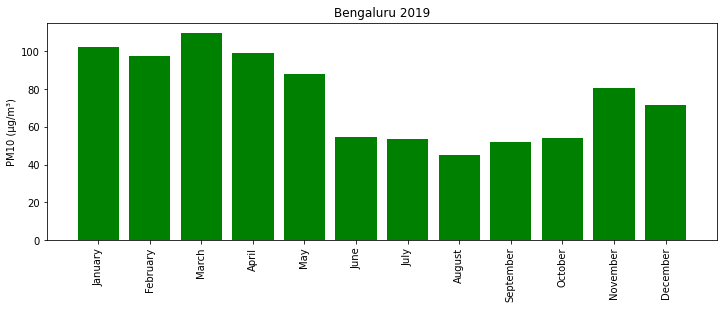

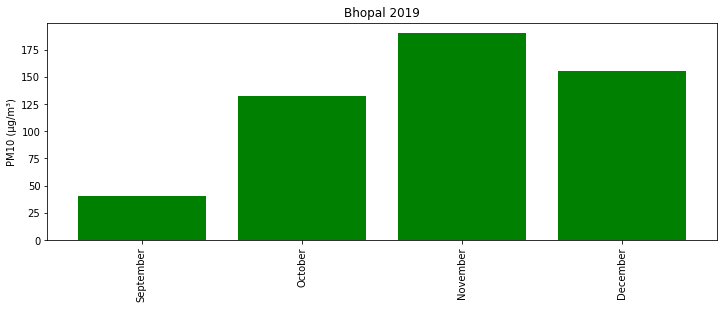

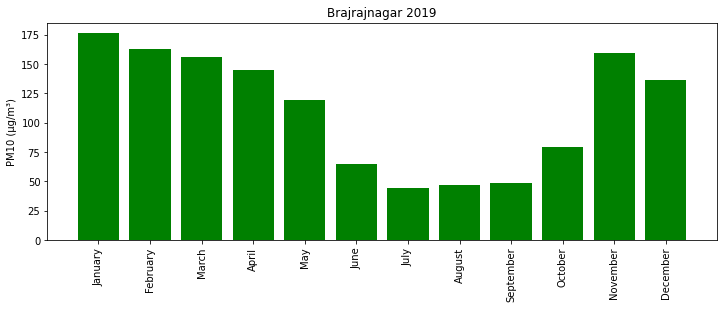

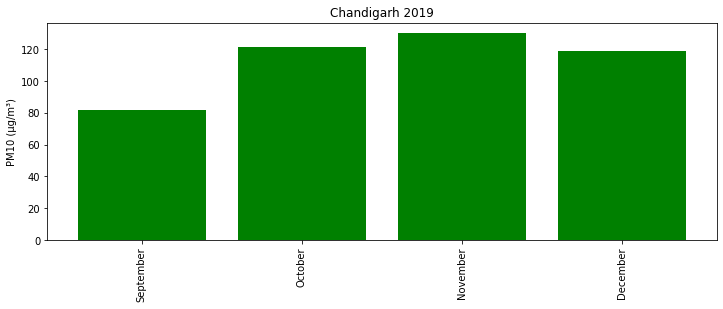

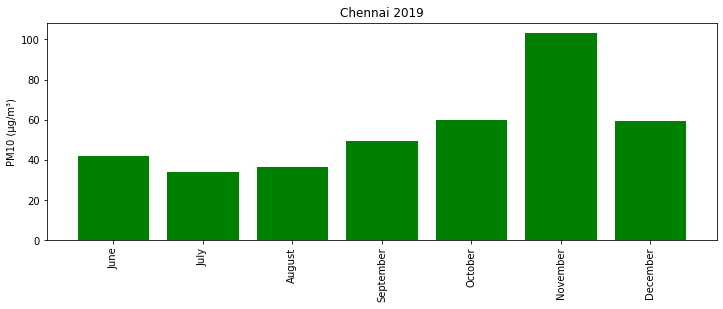

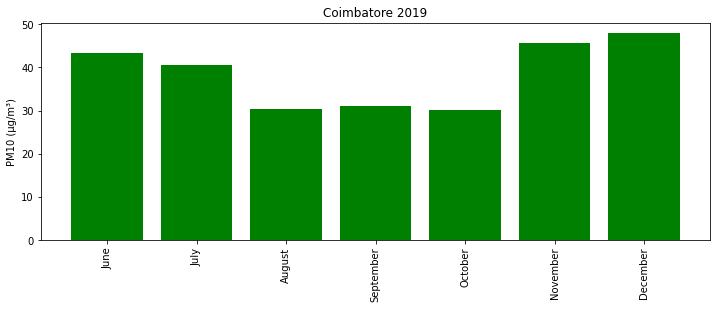

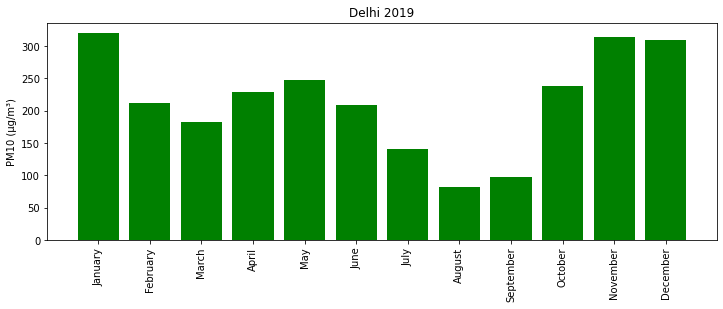

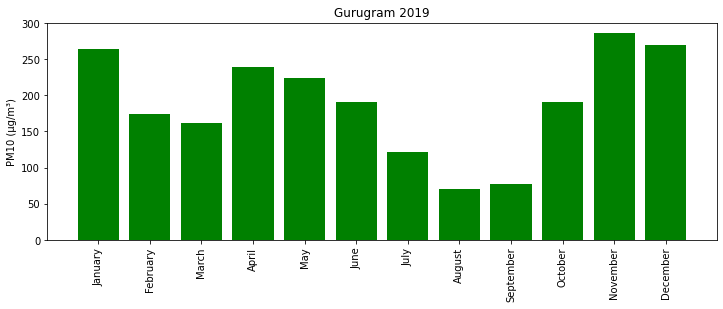

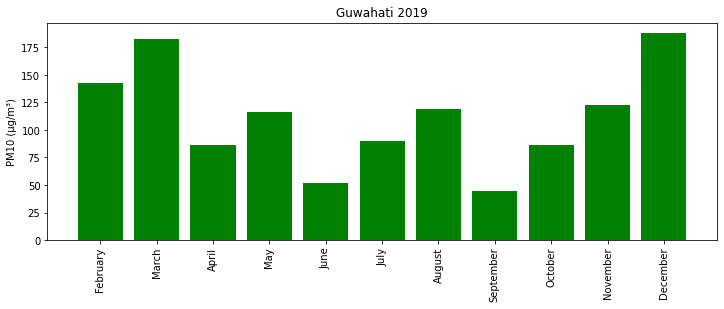

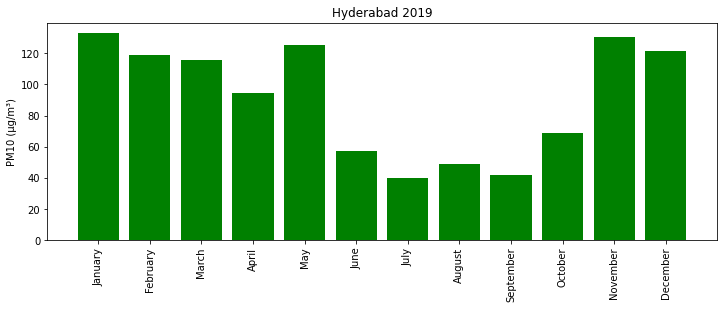

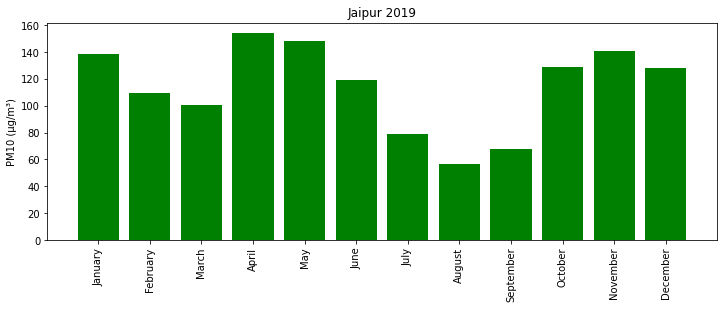

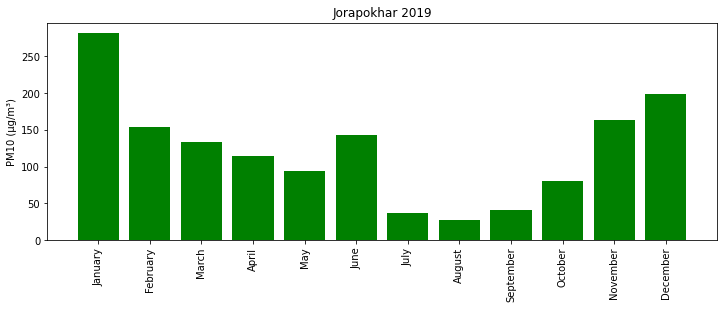

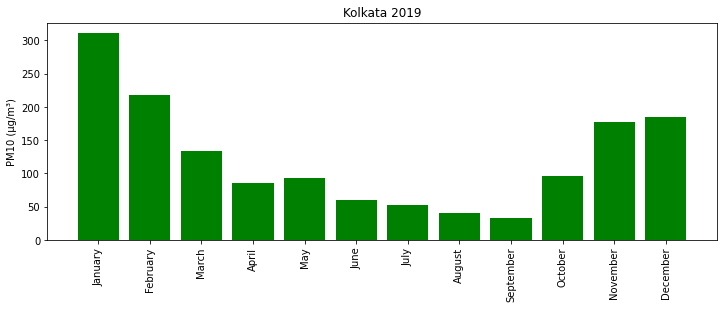

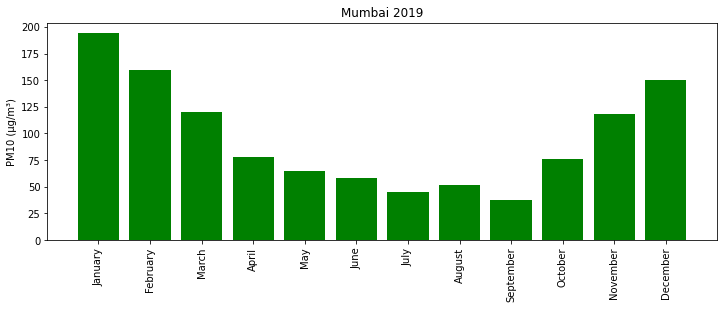

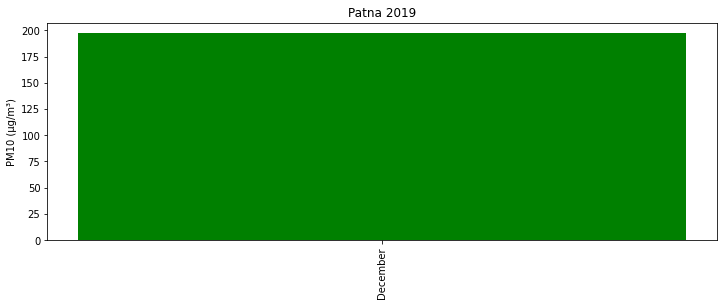

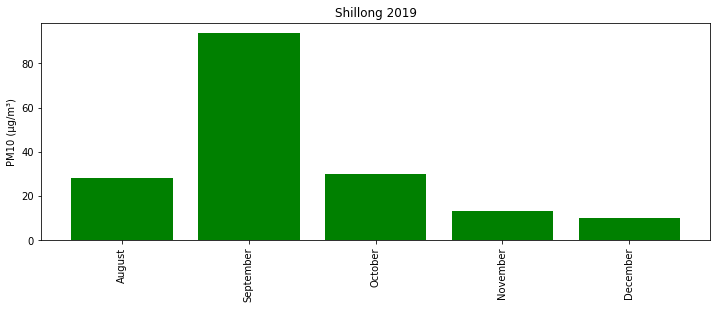

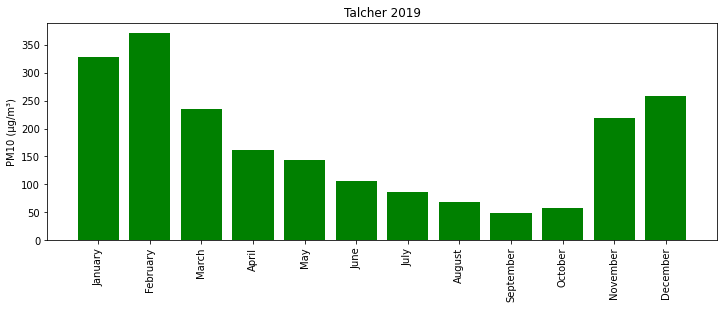

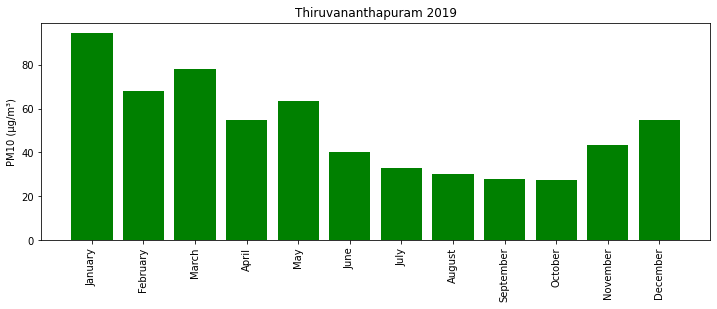

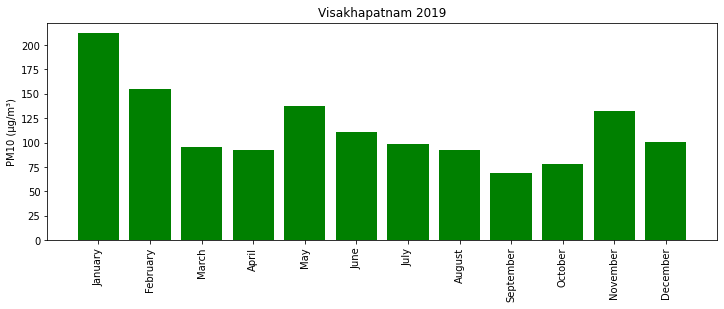

In [180]:
years = ['2019']


plt.rcParams['figure.figsize'] = [12,4]

for i in range(len(years)):
    year = years[i]  
    
    for j in range(len(cities_all)):
        city = cities_all[j]       
        filter1 = df[(df['year'] == year) & (df['City'] == city) & (df['PM10'] >0)]
        months = filter1['month'].unique().tolist()
        values = []
        
        for k in range(len(months)):
            month = months[k]
#             filter2 = filter1[(filter1['month'] == month)]
#             filter3 = filter2['PM10'].agg([np.mean])
#             lista = filter3.tolist()
            lista = filter1[(filter1['month'] == month)]['PM10'].agg([np.mean]).tolist()
            values.extend(lista)
   
        if len(values)>0: 
        
            for n, i in enumerate(months):
                if i == '01':
                    months[n] = 'January'
                if i == '02':
                    months[n] = 'February'
                if i == '03':
                    months[n] = 'March'
                if i == '04':
                    months[n] = 'April'
                if i == '05':
                    months[n] = 'May'
                if i == '06':
                    months[n] = 'June'
                if i == '07':
                    months[n] = 'July'
                if i == '08':
                    months[n] = 'August'
                if i == '09':
                    months[n] = 'September'
                if i == '10':
                    months[n] = 'October'
                if i == '11':
                    months[n] = 'November'
                if i == '12':
                    months[n] = 'December'


            plt.title(city + ' ' + year)
            plt.xticks(rotation=90)
            plt.bar(months,values,label="Mean",color="g")
            
            plt.ylabel("PM10 (µg/m³)")
            plt.show()


### <center> Pregled srednje godišnje vrednosti pojedinačnih parametara po gradovima i godinama

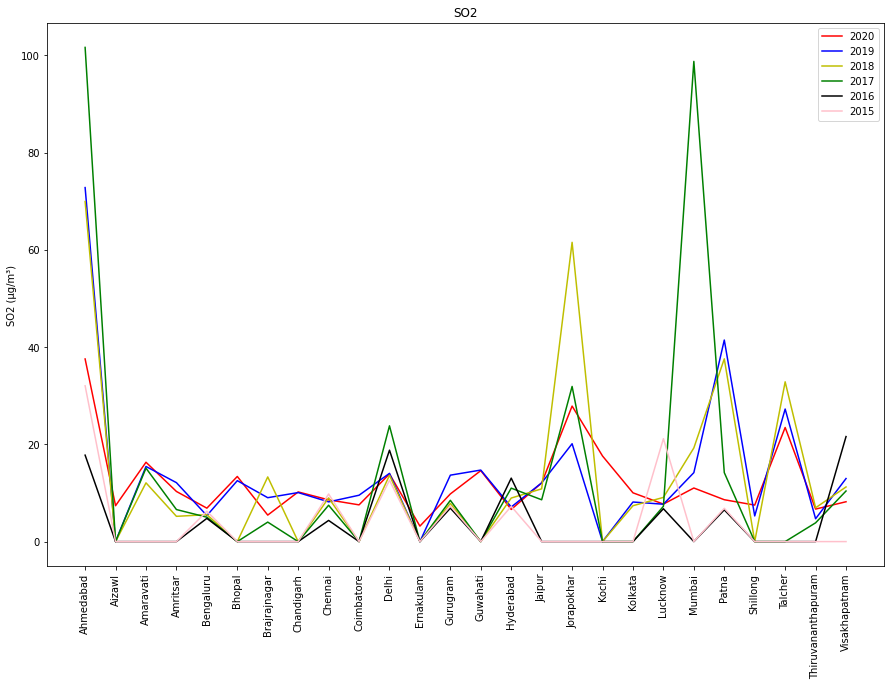

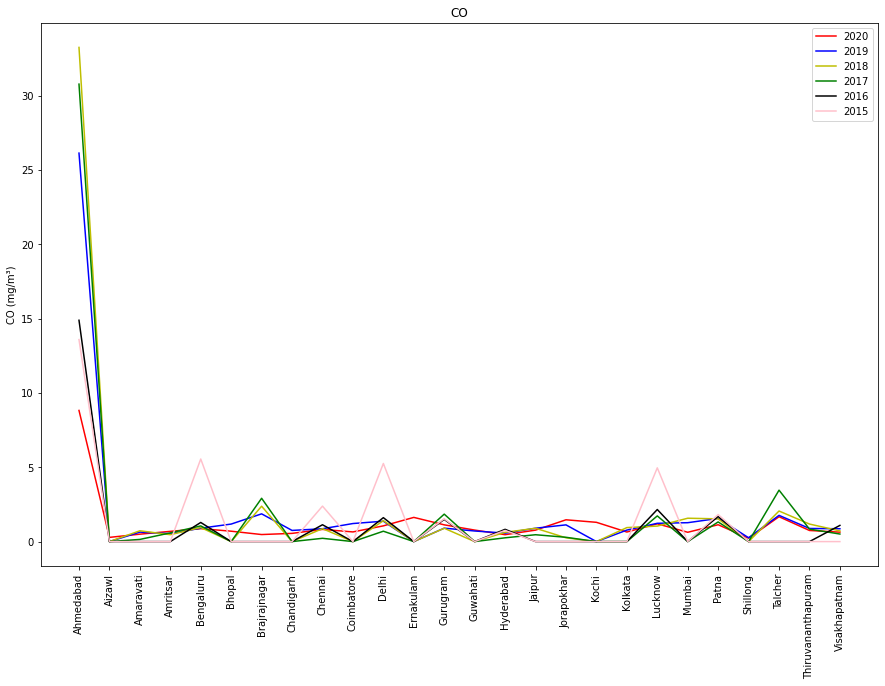

[10.618032786885248]
[9.408053097345134]
[2.0104371584699456]
[18.83278409090909]
[5.308142076502733]
[4.649712643678161]
[46.275425531914884]
[7.435081967213114]
[8.034043715846995]
[1.668359375]
[22.692240437158468]
[23.18379746835443]
[15.099508196721311]
[23.39950819672131]
[8.490874316939891]
[8.305737704918034]
[21.03817679558011]
[71.771625]
[21.992622950819676]
[12.69978142076503]
[23.074153005464478]
[56.41393442622951]
[0.8870967741935484]
[18.37838709677419]
[8.51551912568306]
[6.637127071823203]
[26.13384401114206]
[nan]
[4.343616352201257]
[17.147445054945056]
[9.931232876712327]
[10.95632075471698]
[14.037614678899082]
[15.297521367521366]
[8.654493150684932]
[10.976748768472907]
[32.11410958904109]
[nan]
[21.280219178082195]
[18.112012578616355]
[5.050191780821918]
[13.64095890410959]
[8.881937500000001]
[nan]
[27.366301369863017]
[14.964931506849316]
[31.810416666666665]
[20.927416666666666]
[0.9655208333333333]
[28.94640804597701]
[2.3521229050279335]
[13.9578309859154

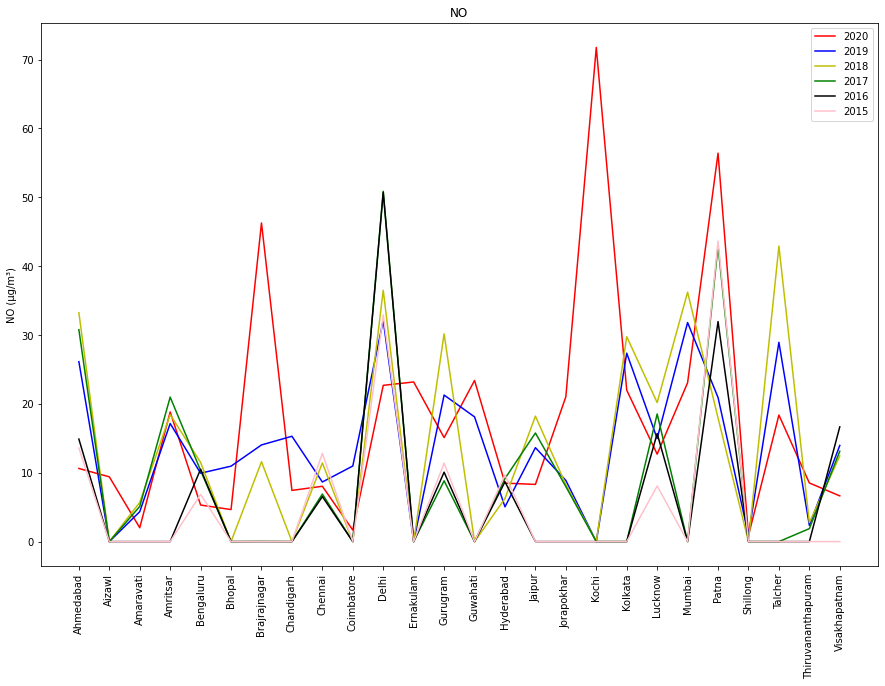

In [195]:
years = ['2020','2019','2018','2017','2016','2015']


plt.rcParams['figure.figsize'] = [15, 10]


#SO2
for i in range(len(years)):
    year = years[i]  
    filter1 = df[(df['year'] == year)] 
    values = []
    
    for k in range(len(cities_all)):
        city = cities_all[k]
        lista = filter1[(filter1['City'] == city)]['SO2'].agg([np.mean]).tolist()
      
        for vrednost in lista:
            if not math.isnan(vrednost):
                values.append(vrednost)
            else:
                values.append(0)
         
    if len(values)>0: 

        if year == '2020':
           color_line = 'r'
        elif year == '2019':
           color_line = 'b'
        elif year == '2018':
           color_line = 'y'
        elif year == '2017':
           color_line = 'g'
        elif year == '2016':
           color_line = 'black'
        elif year == '2015':
           color_line = 'pink'

        plt.title('SO2')
        plt.xticks(rotation=90)
        plt.plot(cities_all,values,label=year,color= color_line)
        plt.ylabel("SO2 (µg/m³)")
        plt.legend()

plt.show()

# CO
for i in range(len(years)):
    year = years[i]  
    filter1 = df[(df['year'] == year)]
    values = []

    for k in range(len(cities_all)):
        city = cities_all[k]  
        lista = filter1[(filter1['City'] == city)]['CO'].agg([np.mean]).tolist()
        for vrednost in lista:
            if not math.isnan(vrednost):
                values.append(vrednost)
            else:
                values.append(0)
           
    if len(values)>0:  
       
        if year == '2020':
           color_line = 'r'
        elif year == '2019':
           color_line = 'b'
        elif year == '2018':
           color_line = 'y'
        elif year == '2017':
           color_line = 'g'
        elif year == '2016':
           color_line = 'black'
        elif year == '2015':
           color_line = 'pink'

        plt.title('CO')
        plt.xticks(rotation=90)
        plt.plot(cities_all,values,label=year,color= color_line)
        plt.ylabel("CO (mg/m³)")
        plt.legend()

plt.show()

# NO
for i in range(len(years)):
    year = years[i]  
    filter1 = df[(df['year'] == year)]
    values = []

    for k in range(len(cities_all)):
        city = cities_all[k]     
        lista = filter1[(filter1['City'] == city)]['NO'].agg([np.mean]).tolist()
        for vrednost in lista:
            if not math.isnan(vrednost):
                values.append(vrednost)
            else:
                values.append(0)

    if len(values)>0:  

        if year == '2020':
           color_line = 'r'
        elif year == '2019':
           color_line = 'b'
        elif year == '2018':
           color_line = 'y'
        elif year == '2017':
           color_line = 'g'
        elif year == '2016':
           color_line = 'black'
        elif year == '2015':
           color_line = 'pink'

        plt.title('NO')
        plt.xticks(rotation=90)
        plt.plot(cities_all,values,label=year,color= color_line)
        plt.ylabel("NO (µg/m³)")
        plt.legend()

plt.show()

### <center> Prikaz maksimalne godišnje vrednosti pojedinačnog parametra po gradu

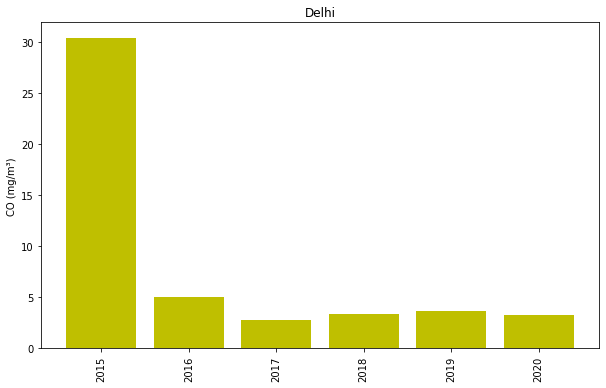

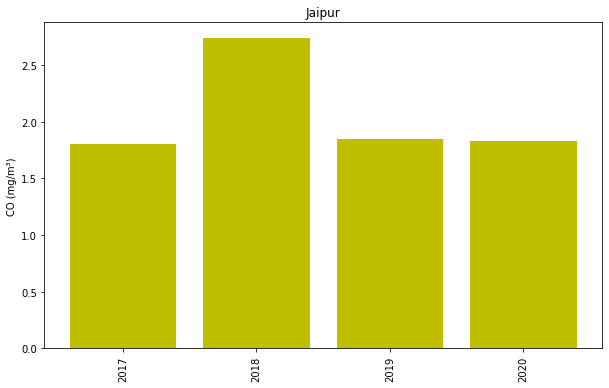

In [200]:
#cities = cities_all
cities = ['Delhi','Jaipur']

years = ['2015','2016','2017','2018','2019','2020']


#dimenzije grafika
plt.rcParams['figure.figsize'] = [10, 6]


for i in range(len(cities)):
    city = cities[i]  
    plt.title(city)
    values = []
    for j in range(len(years)):
        year = years[j]        
        
        lista = df[(df['year'] == year) & (df['City'] == city) & (df['CO'] >0)]['CO'].agg([np.max]).tolist() 
        values.extend(lista)
    
    if len(values)>0: 
        
        plt.xticks(rotation=90)
        plt.bar(years,values,label="Mean",color="y")
        plt.ylabel("CO (mg/m³)") # oznacavamo y label
        plt.show()
        
        


### <center> Pita grafikoni za prikaz godišnjeg udela određene kategorije indeksa kvaliteta vazduha

In [118]:
#pregled raspodele indeksa kvaliteta vazduha po gradovima
pd.crosstab(df['City'], df[['AQI_Bucket'])

AQI_Bucket,Good,Moderate,Poor,Satisfactory,Severe,Very Poor
City,,,,,,
Ahmedabad,1,198,238,43,638,216
Aizawl,83,0,0,28,0,0
Amaravati,158,219,47,409,0,8
Amritsar,84,448,67,473,7,47
Bengaluru,115,630,36,1124,0,5
Bhopal,2,165,31,76,0,4
Brajrajnagar,14,421,120,122,0,36
Chandigarh,48,74,20,154,0,3
Chennai,12,804,110,941,6,11


Severe       224
Very Poor     74
Poor          37
Moderate      17
Name: AQI_Bucket, dtype: int64


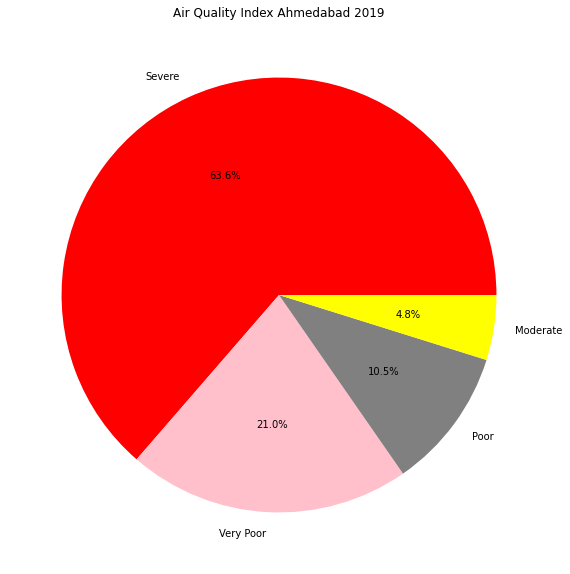

Satisfactory    149
Moderate         81
Good             58
Poor             14
Very Poor         7
Name: AQI_Bucket, dtype: int64


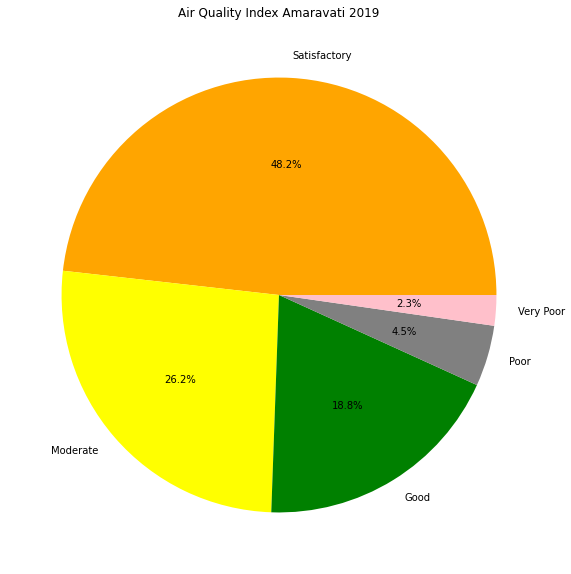

Satisfactory    185
Moderate        125
Good             23
Poor             19
Very Poor        10
Name: AQI_Bucket, dtype: int64


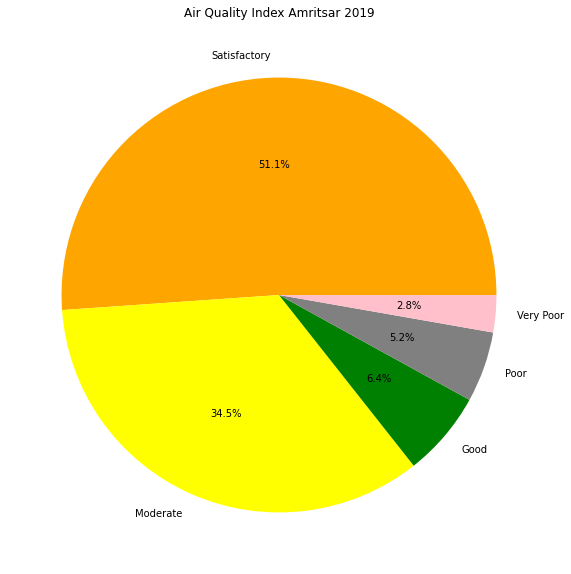

Satisfactory    217
Moderate        140
Good              8
Name: AQI_Bucket, dtype: int64


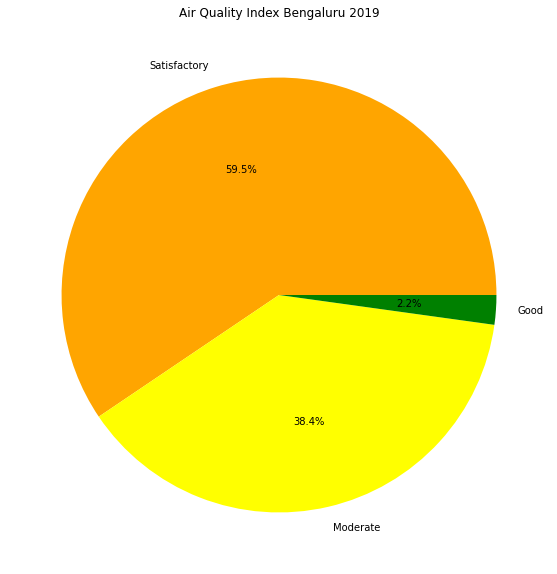

Moderate        55
Poor            26
Satisfactory    20
Very Poor        3
Good             1
Name: AQI_Bucket, dtype: int64


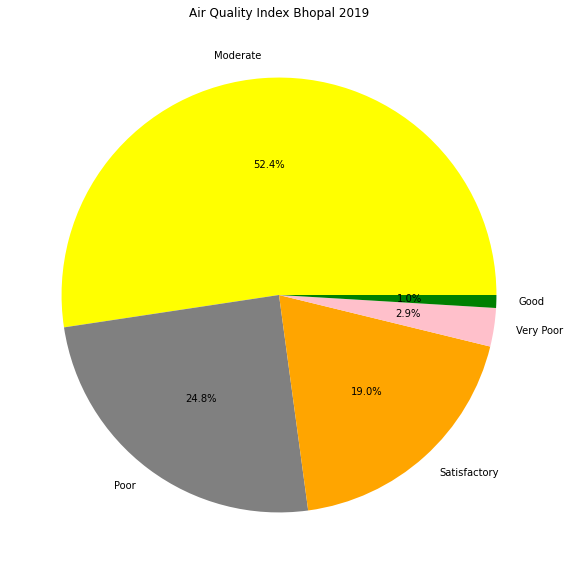

Moderate        190
Satisfactory     62
Poor             57
Very Poor        11
Good              2
Name: AQI_Bucket, dtype: int64


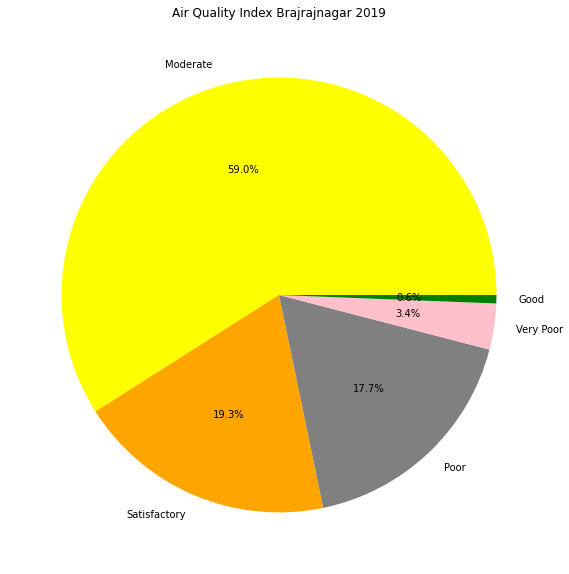

Moderate        47
Satisfactory    45
Poor            20
Very Poor        3
Good             2
Name: AQI_Bucket, dtype: int64


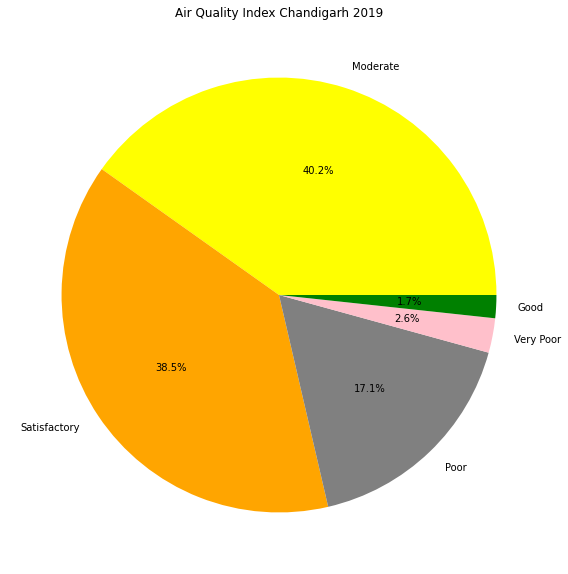

Satisfactory    212
Moderate        134
Poor             12
Good              6
Very Poor         1
Name: AQI_Bucket, dtype: int64


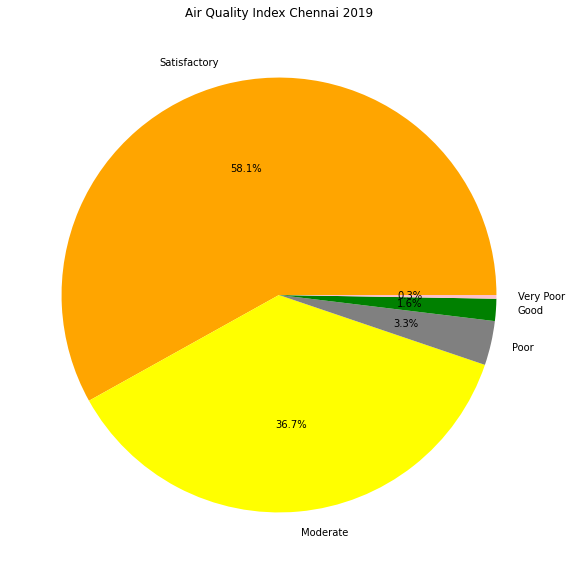

Satisfactory    176
Moderate          7
Good              5
Name: AQI_Bucket, dtype: int64


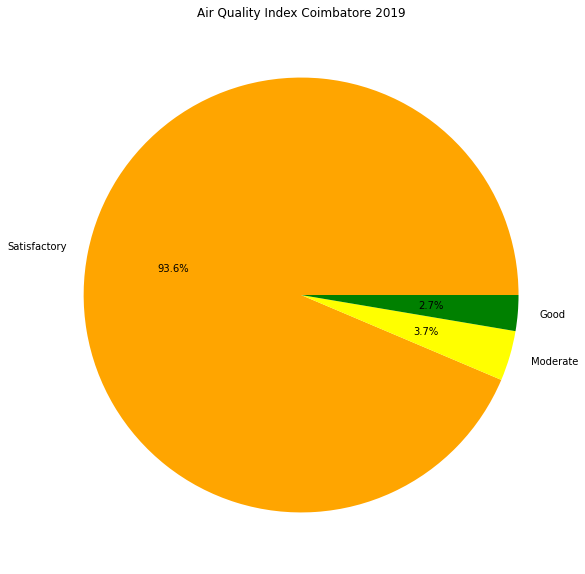

Moderate        128
Poor             99
Very Poor        59
Satisfactory     43
Severe           36
Name: AQI_Bucket, dtype: int64


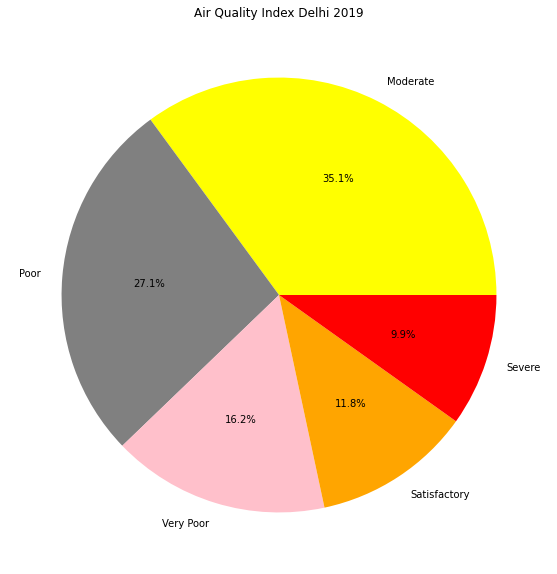

Moderate        121
Poor             82
Satisfactory     79
Very Poor        58
Severe           14
Good             10
Name: AQI_Bucket, dtype: int64


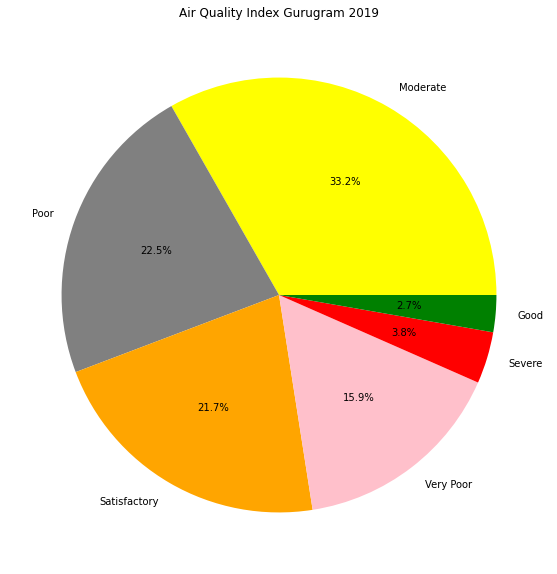

Satisfactory    107
Moderate         78
Good             64
Poor             36
Very Poor        24
Severe            3
Name: AQI_Bucket, dtype: int64


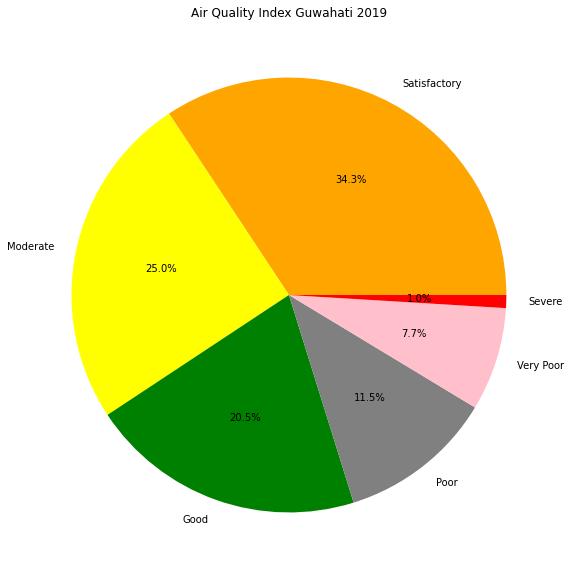

Moderate        164
Satisfactory    142
Good             59
Name: AQI_Bucket, dtype: int64


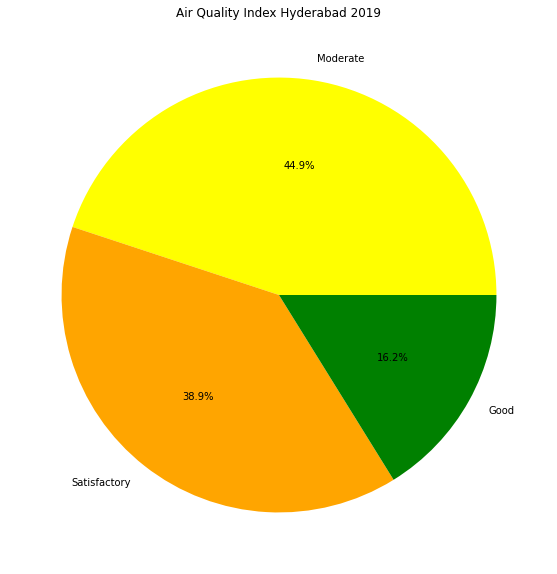

Moderate        221
Satisfactory    124
Poor             14
Very Poor         3
Good              2
Severe            1
Name: AQI_Bucket, dtype: int64


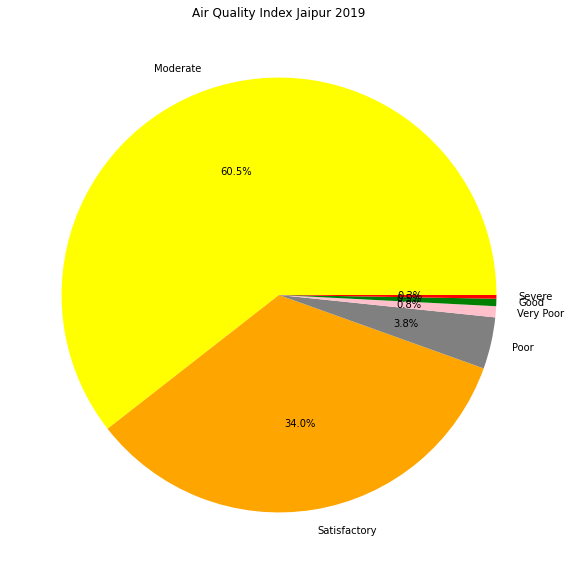

Moderate        150
Satisfactory     71
Poor             57
Very Poor        12
Severe            7
Good              6
Name: AQI_Bucket, dtype: int64


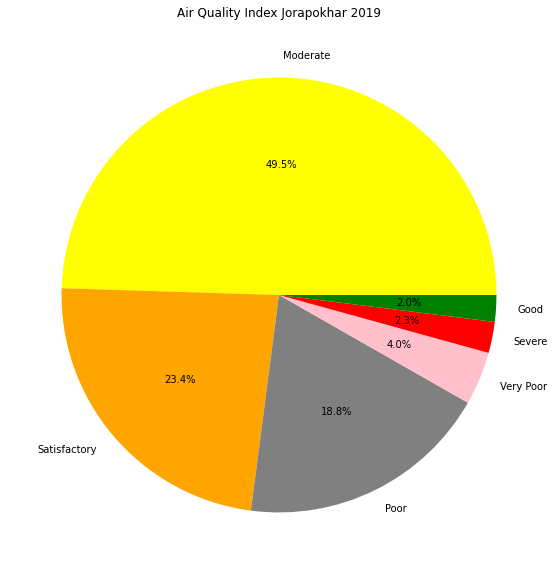

Satisfactory    135
Moderate         78
Poor             63
Good             53
Very Poor        27
Severe            9
Name: AQI_Bucket, dtype: int64


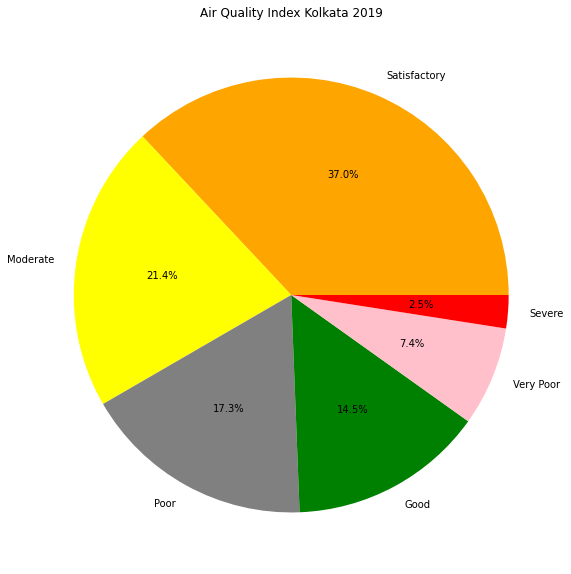

Moderate        123
Poor             86
Satisfactory     75
Very Poor        73
Severe            8
Name: AQI_Bucket, dtype: int64


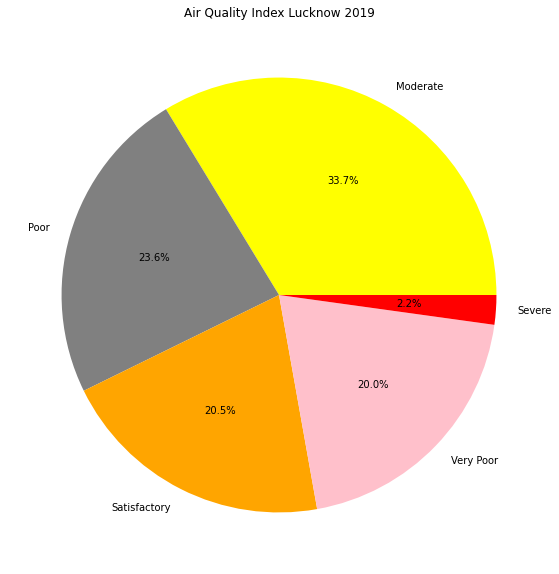

Satisfactory    202
Moderate        133
Poor             20
Good             10
Name: AQI_Bucket, dtype: int64


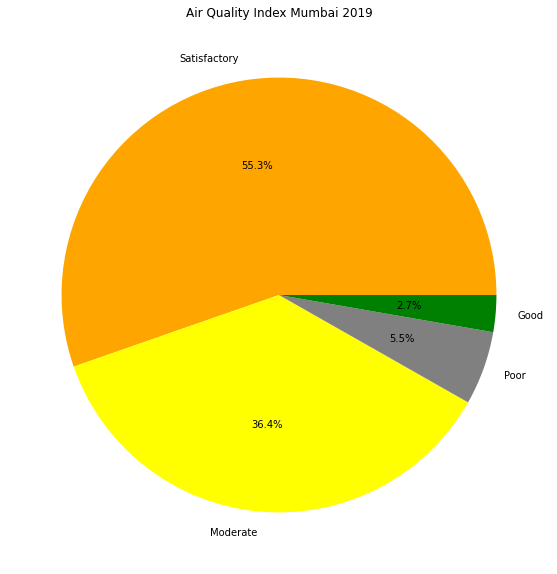

Moderate        146
Very Poor        78
Satisfactory     54
Poor             48
Severe           33
Name: AQI_Bucket, dtype: int64


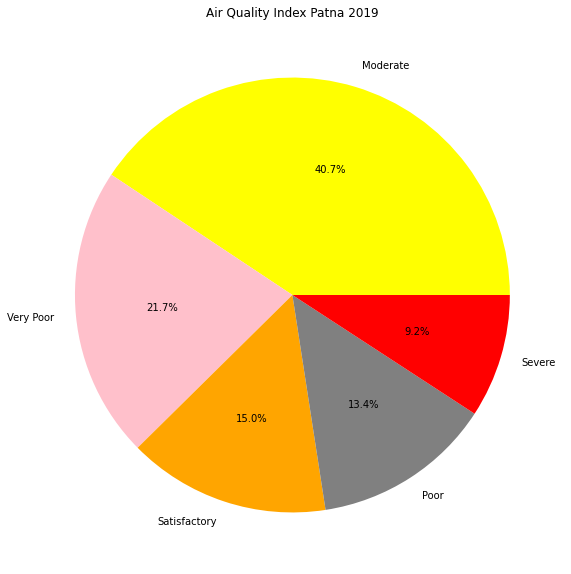

Good            47
Satisfactory    15
Moderate         1
Name: AQI_Bucket, dtype: int64


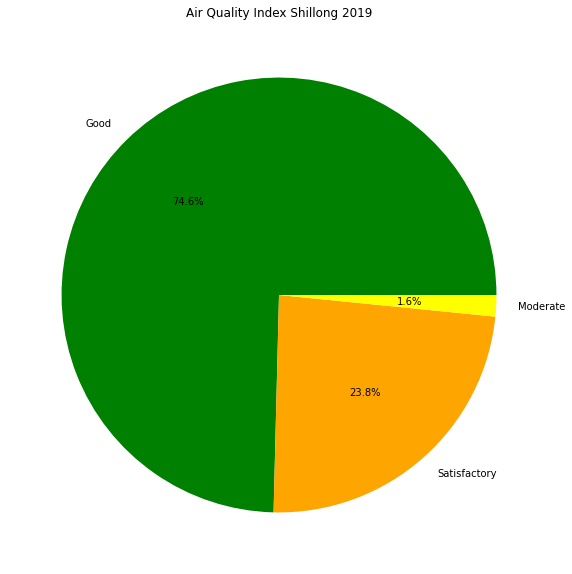

Moderate        129
Satisfactory     87
Poor             39
Very Poor        36
Severe           10
Good              2
Name: AQI_Bucket, dtype: int64


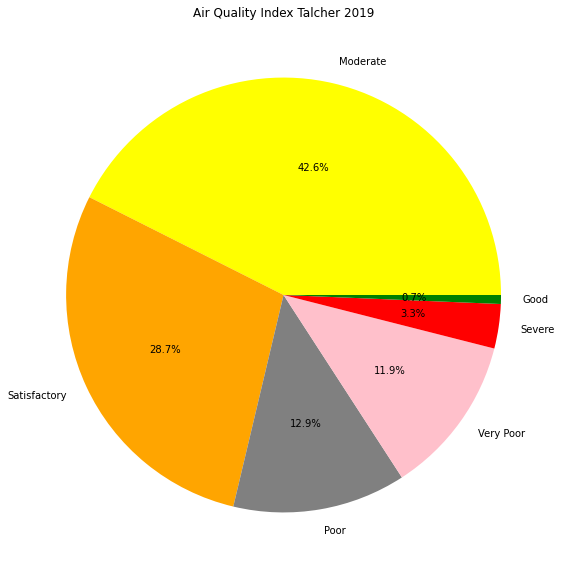

Satisfactory    256
Moderate         52
Good             43
Name: AQI_Bucket, dtype: int64


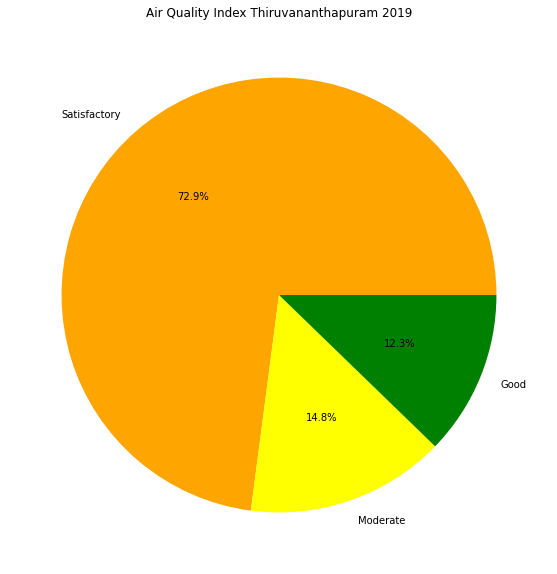

Moderate        170
Satisfactory    122
Poor             25
Very Poor        13
Good             11
Name: AQI_Bucket, dtype: int64


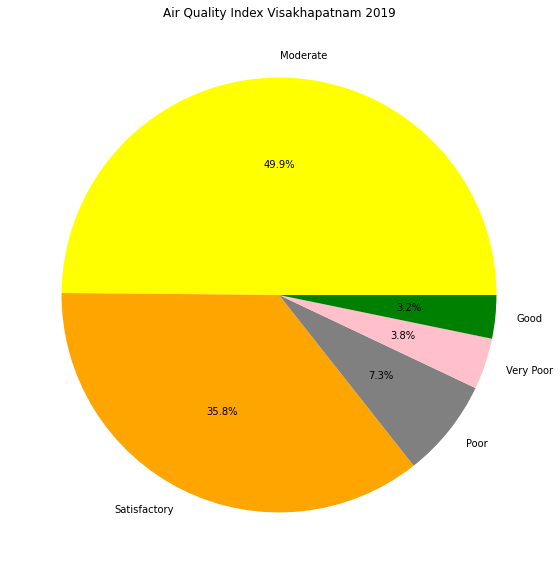

In [205]:
years = ['2019']

#dimenzije grafika
plt.rcParams['figure.figsize'] = [15, 10]

#podesavanje boja za pita grafikon
colors = {'Moderate': 'yellow',
           'Satisfactory': 'orange',
           'Poor': 'gray',
           'Very Poor': 'pink',
           'Severe': 'red',
           'Good': 'green'}

#filtriranje
for i in range(len(years)):
    year = years[i]  
          
    for i in range(len(cities_all)):
        city = cities_all[i]     
        
        filter1 = df[(df['AQI'] > 0) & (df['City'] == city) & (df['year'] == year)]
        
        if not filter1.empty:

            filter2 = filter1['AQI_Bucket'].value_counts()
            print(filter2)

            plt.pie(filter2,labels=list(filter2.index),colors=[colors[key] for key in list(filter2.index)], autopct='%1.1f%%');
            plt.title('Air Quality Index ' + city + ' ' + year)
            plt.show()


In [120]:
#pivot tabela - pregled maksimalnih vrednosti odabranih parametara po gradovima
df.pivot_table(['PM2.5', 'PM10', 'NOx', 'SO2','O3','NH3','Benzene','Toluene', 'Xylene'],
               ['City'], aggfunc='max')

,Benzene,NH3,NOx,O3,PM10,PM2.5,SO2,Toluene,Xylene
City,,,,,,,,,
Ahmedabad,115.14,NaN,246.03,162.43,586.27,381.69,186.08,371.65,109.23
Aizawl,81.92,36.73,25.15,13.38,62.86,54.90,13.53,82.01,NaN
Amaravati,53.89,35.20,103.49,138.18,230.27,139.38,66.39,76.32,137.45
Amritsar,26.09,129.46,150.96,66.70,917.08,868.66,67.26,30.21,53.59
Bengaluru,307.42,120.07,147.06,157.20,351.51,313.59,92.66,411.52,NaN
Bhopal,NaN,51.91,59.01,109.33,260.27,136.42,47.46,NaN,NaN
Brajrajnagar,299.61,194.46,382.84,97.06,589.39,308.79,24.97,NaN,NaN
Chandigarh,64.33,100.35,70.53,62.28,224.22,154.85,18.14,25.74,116.62
Chennai,391.88,352.89,77.57,105.13,346.73,293.43,50.51,265.98,NaN


### <center> Uporedni prikaz maksimalnih godišnjih vrednosti odabranih merenih parametara za odabrane gradove

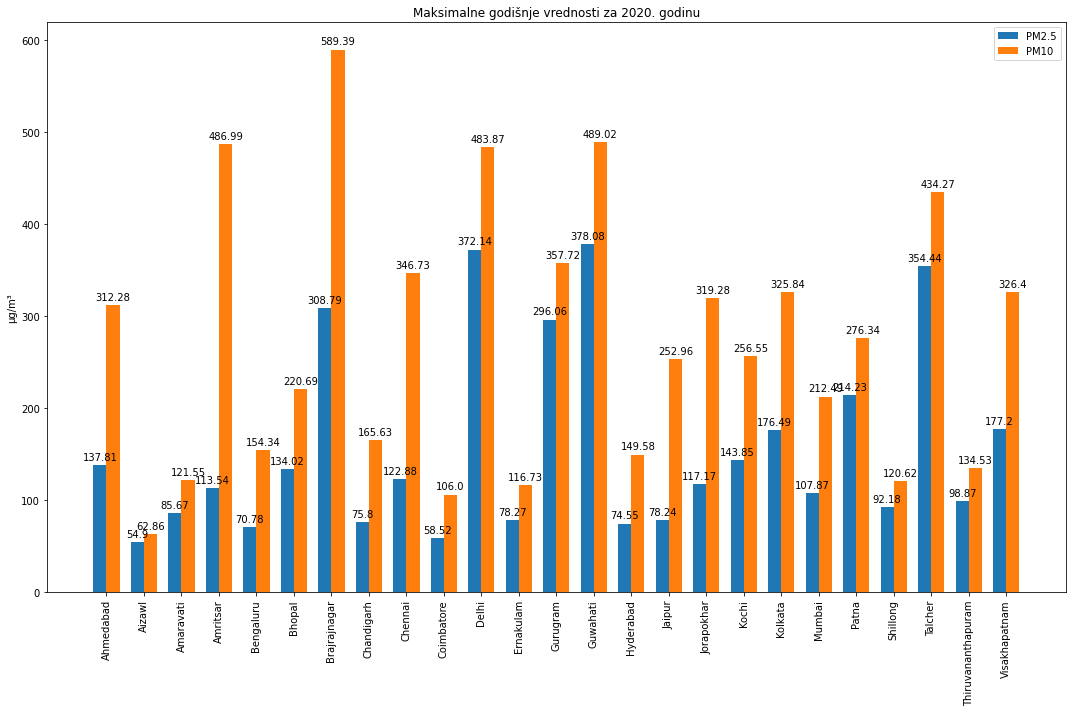

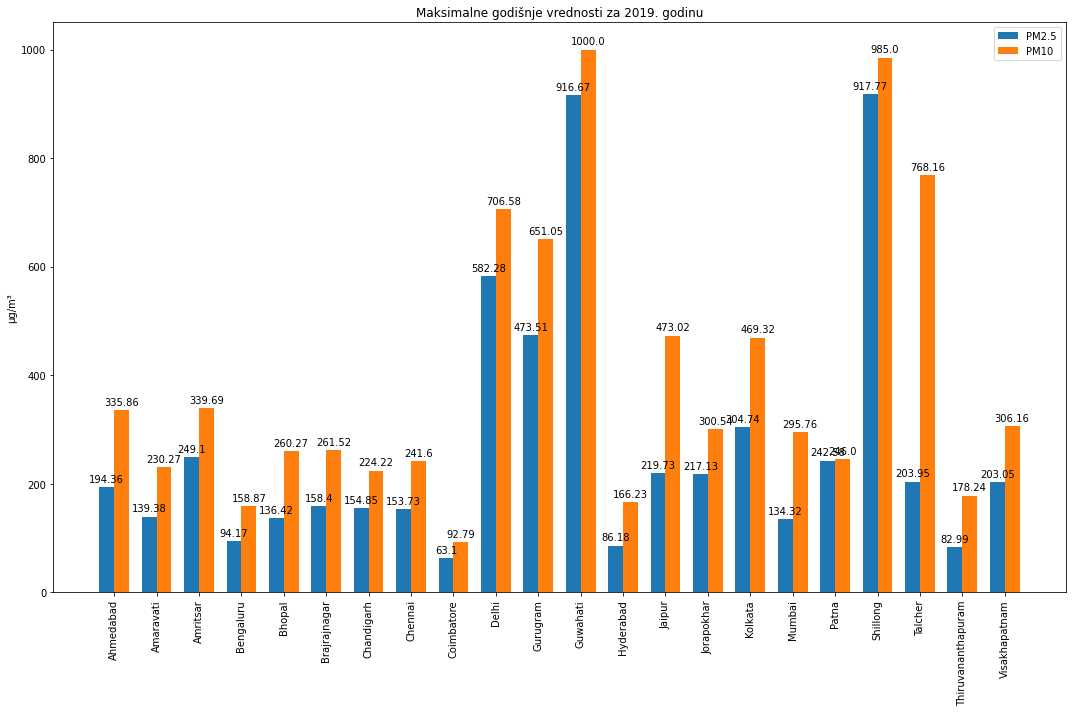

In [211]:
years = ['2020','2019']
#parametri PM2.5 i PM10
for i in range(len(years)):
    year = years[i]  
           
    filter1 = df[(df['year'] == year) & (df['PM2.5'] >0) & (df['PM10'] >0)]
    cities = filter1['City'].unique().tolist()
    values25 = [] 
    values10 = []
    
    for k in range(len(cities)):
        city = cities[k]
        lista25 = filter1[(filter1['City'] == city)]['PM2.5'].agg([np.max]).tolist()
        lista10 = filter1[(filter1['City'] == city)]['PM10'].agg([np.max]).tolist()
        
        values25.extend(lista25)
        values10.extend(lista10)

    x = np.arange(len(cities))  # lokacije labela
    width = 0.35  # širina bar-a

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, values25, width, label='PM2.5')
    rects2 = ax.bar(x + width/2, values10, width, label='PM10')

    ax.set_ylabel('µg/m³')
    ax.set_title(year)
    ax.set_xticks(x)
    ax.set_xticklabels(cities)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    plt.xticks(rotation=90)
    fig.tight_layout()
    plt.title('Maksimalne godišnje vrednosti za ' + year + '. godinu' )
    plt.show()

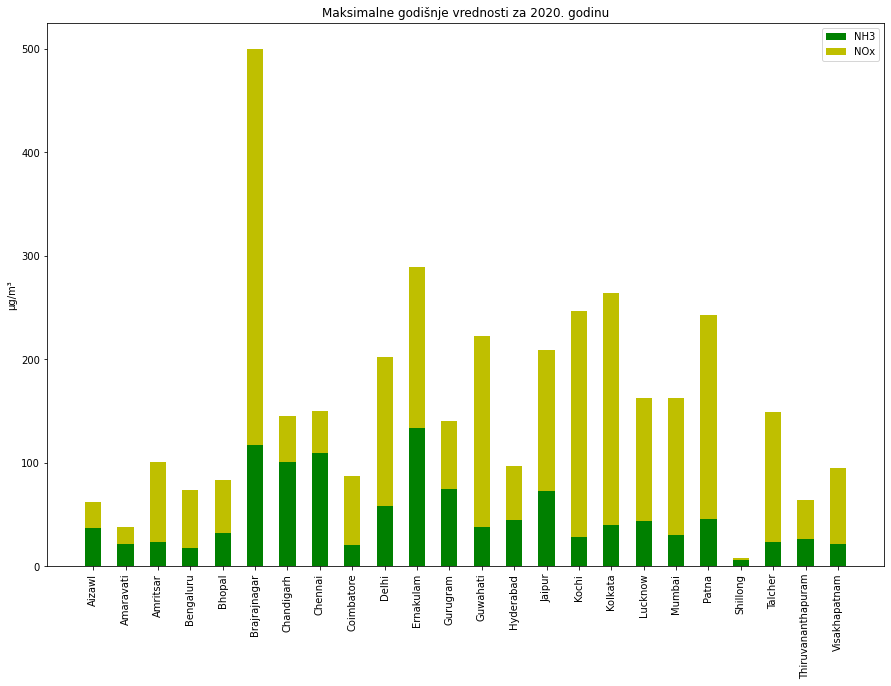

In [218]:
years = ['2020']

for i in range(len(years)):
    year = years[i]  
           
    
    filter1 = df[(df['year'] == year) & (df['NH3'] >0) & (df['NOx'] >0)]

    cities = filter1['City'].unique().tolist()
    values_param1 = [] 
    values_param2 = []
    for k in range(len(cities)):
        city = cities[k]
        
        lista_param1 = filter1[(filter1['City'] == city)]['NH3'].agg([np.max]).tolist()
        lista_param2 = filter1[(filter1['City'] == city)]['NOx'].agg([np.max]).tolist()
        
        values_param1.extend(lista_param1)
        values_param2.extend(lista_param2)

#crtanje grafika
    N = len(cities)
  
    ind = np.arange(N)    # x lokacije za grupe
    width = 0.50     

    p1 = plt.bar(ind, values_param1, width, color ="g")
    p2 = plt.bar(ind, values_param2, width, color ="y", bottom=values_param1)
   
    plt.ylabel('µg/m³')
    plt.title('Maksimalne godišnje vrednosti za ' + year + '. godinu' )
    plt.xticks(ind, (cities))
    plt.xticks(rotation=90)
    plt.legend((p1[0], p2[0]), ('NH3', 'NOx'))

    plt.show()

### <Center> Histogram dnevne koncentracije ozona u gradu tokom kalendarske godine 

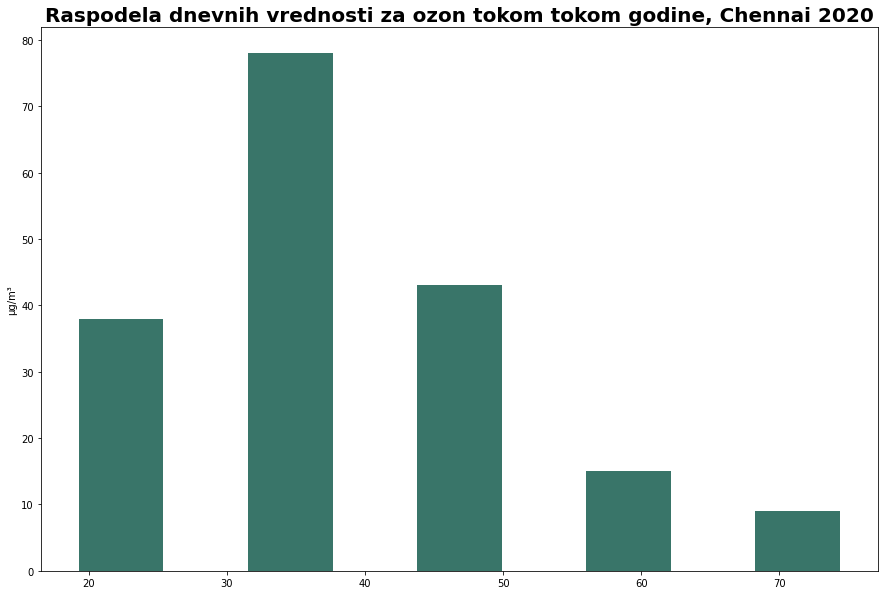

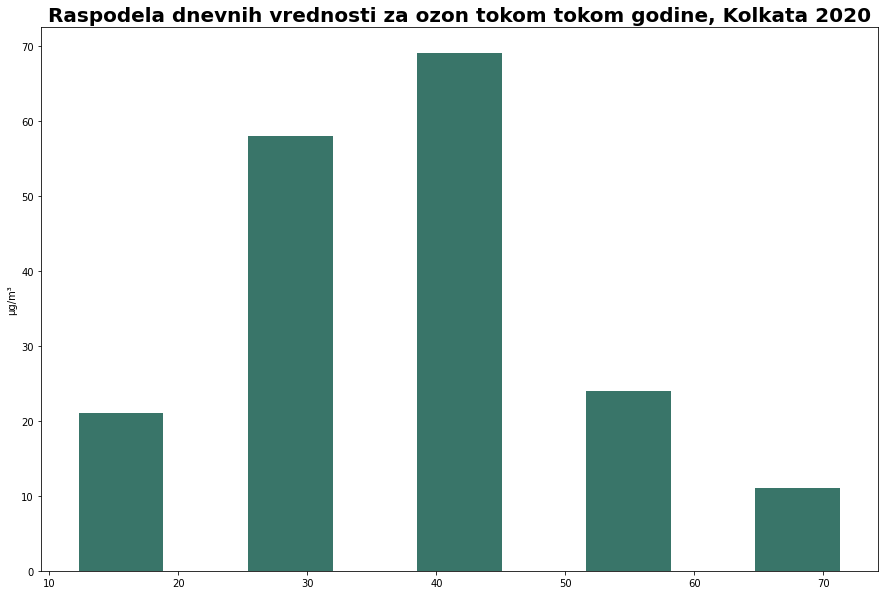

In [226]:
year = ['2018','2019']

for i in range(len(years)):
    year = years[i]  

    filter1 = df[(df['year'] == year) &  (df['O3'] >0) ]

    #cities = filter1['City'].unique().tolist()
    cities = ['Chennai','Kolkata']
    
    for k in range(len(cities)):
        city = cities[k]    
        lista = filter1[(filter1['City'] == city)]['O3'].tolist()

        if len(lista)>0: 

            plt.hist(lista,bins=5,histtype="bar",rwidth=0.5,align="mid", color="#397569")
            plt.title(('Raspodela dnevnih vrednosti za ozon tokom tokom godine, '+ city +' ' + year), fontdict={"fontweight":"bold",'fontsize':20})
            plt.ylabel('µg/m³')
            plt.show()

### <center> Upoređivanje dnevnih vrednosti parametara za grad tokom godine sa propisanom dozvoljenom vrednošću 

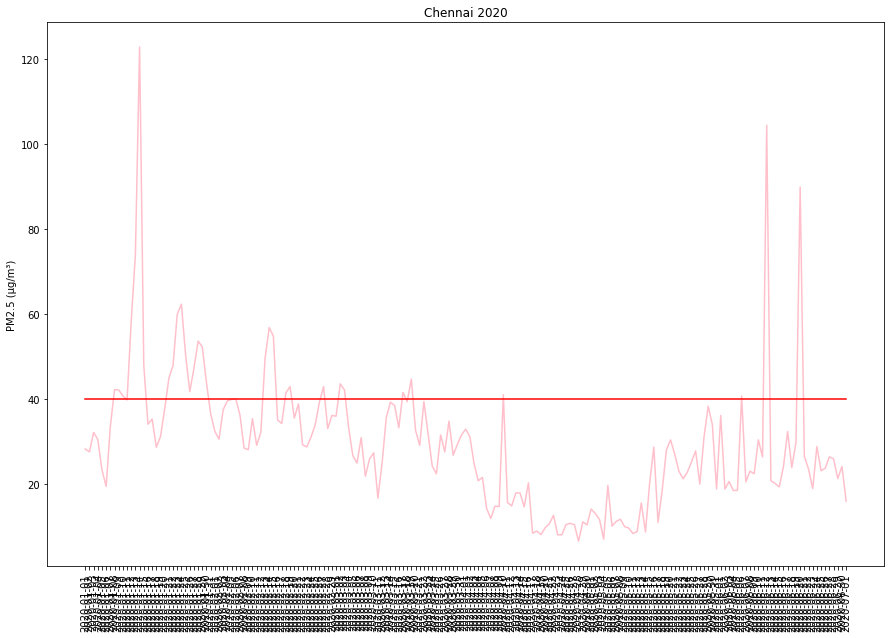

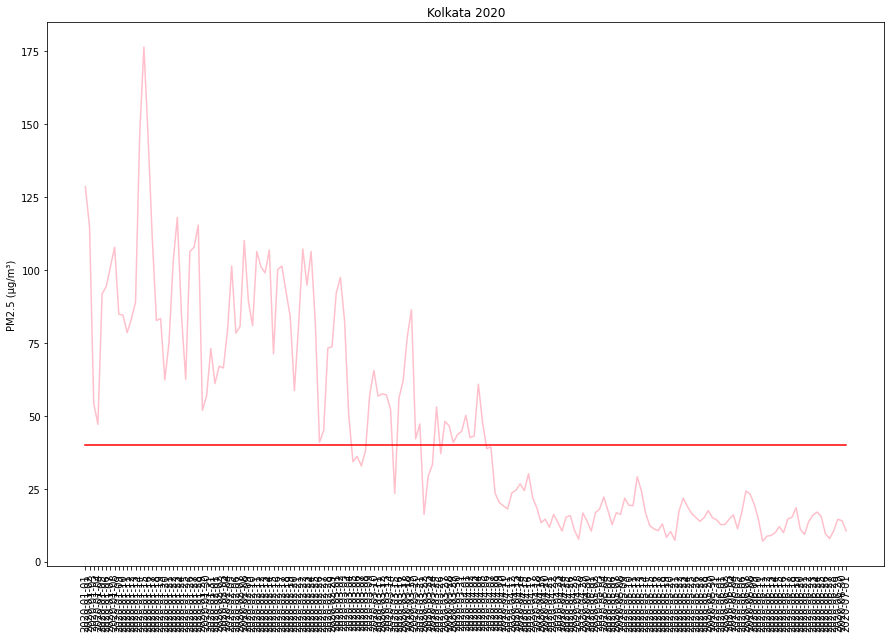

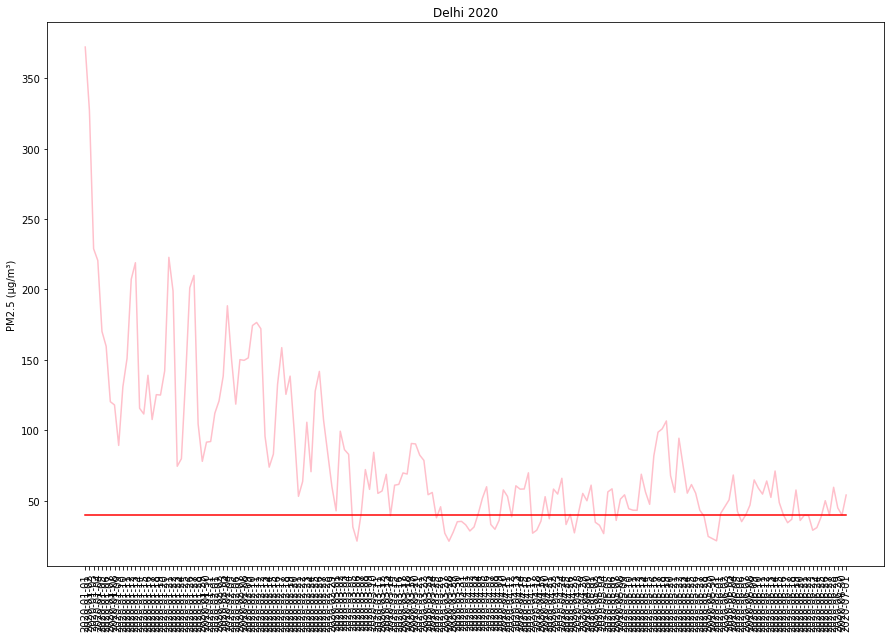

In [236]:
allowed_parameter_values ={"PM2.5":40, 
                          "PM10":60,
                          "SO2":50,
                          "NOx":40,
                          "O3":100,
                          "NH3":100,
                          "CO2":5,
                          "Benzene":5} # za referencu

years = ['2020']
cities = ['Chennai','Kolkata','Delhi']

for i in range(len(years)):
    year = years[i]  
    filter1 = df[(df['year'] == year)]
    values = []

    for k in range(len(cities)):
        city = cities[k]
        filter2 = filter1[(filter1['City'] == city)]
        values = filter2['PM2.5'].tolist()
        dates = filter2['Date'].tolist()
               
        values = [0 if math.isnan(x) else x for x in values]
      
        if len(values)>0:  
            #datum se konvertuje u datetime jer je trenutno string
            for n in range(len(dates)):
                dates[n]=datetime.datetime.strptime(dates[n], '%Y-%m-%d')

            plt.title(city + ' ' + year)
            plt.xticks(rotation=90)
            plt.plot(dates,values,label=year,color= color_line)
            plt.ylabel("PM2.5 (µg/m³)")
            
            
            values_limit= []
            for n in range(len(dates)):
                values_limit.append(40)
            plt.plot(dates,values_limit,label=year,color= 'r')

        plt.show()

### <center> Uporedni pregled srednjih godišnjih vrednosti indeksa zagadjenja vazduha (AQI)

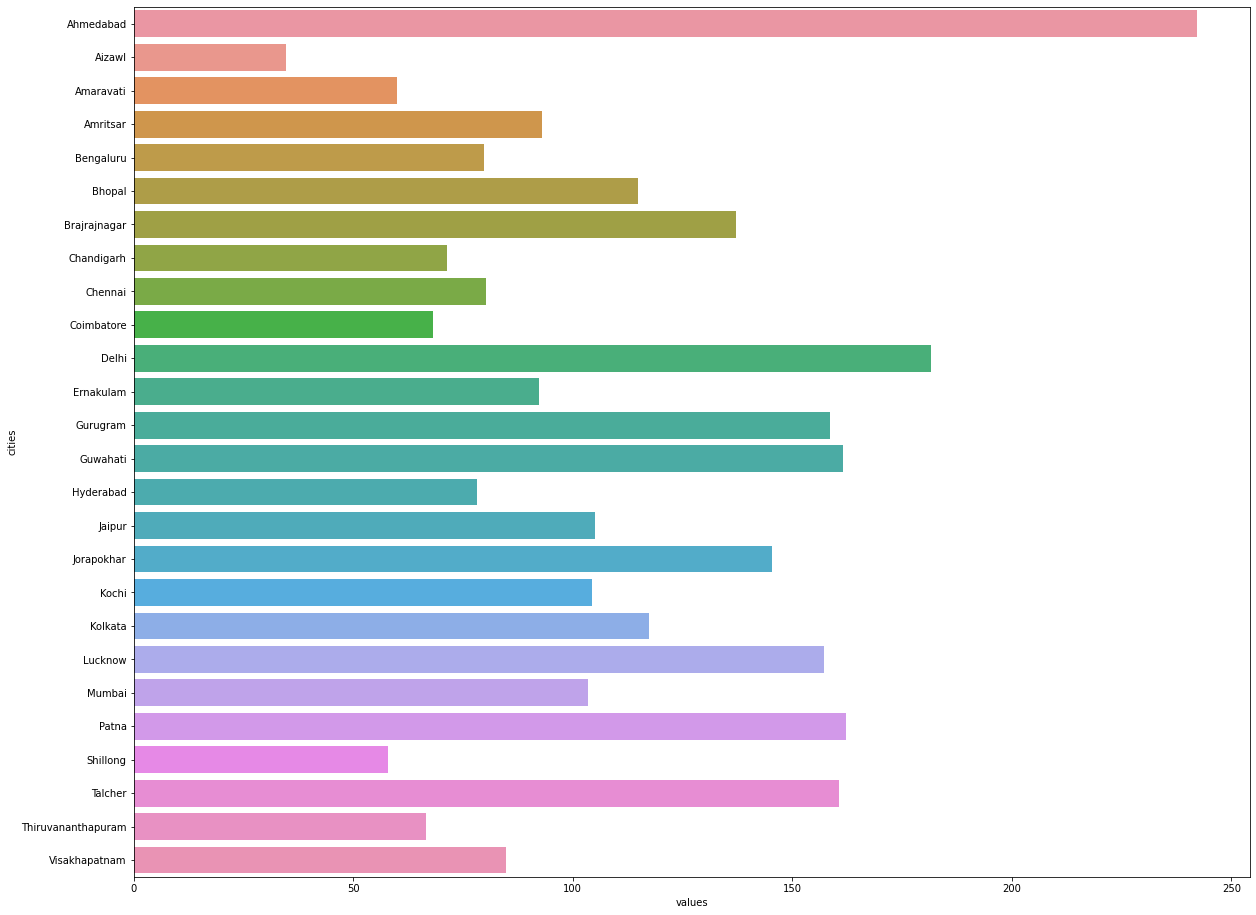

In [235]:
year='2020'
values = []

for i in range(len(cities_all)):
    
    filter1 = df[(df['year'] == year) & (df['City'] == cities_all[i]) &  (df['AQI'] >0) ]
    filter2 = filter1['AQI'].agg([np.mean]).tolist()
    
    values.extend(filter2)

plot_data = pd.DataFrame(
    {'cities': cities_all,
     'values': values
    })


ax = sns.barplot(x=plot_data['values'], y=plot_data['cities'], data=plot_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(20, 16)

### <center> Grafikon gustine dnevnih vrednosti dva pojedinačna parametara iz dva grada tokom godine

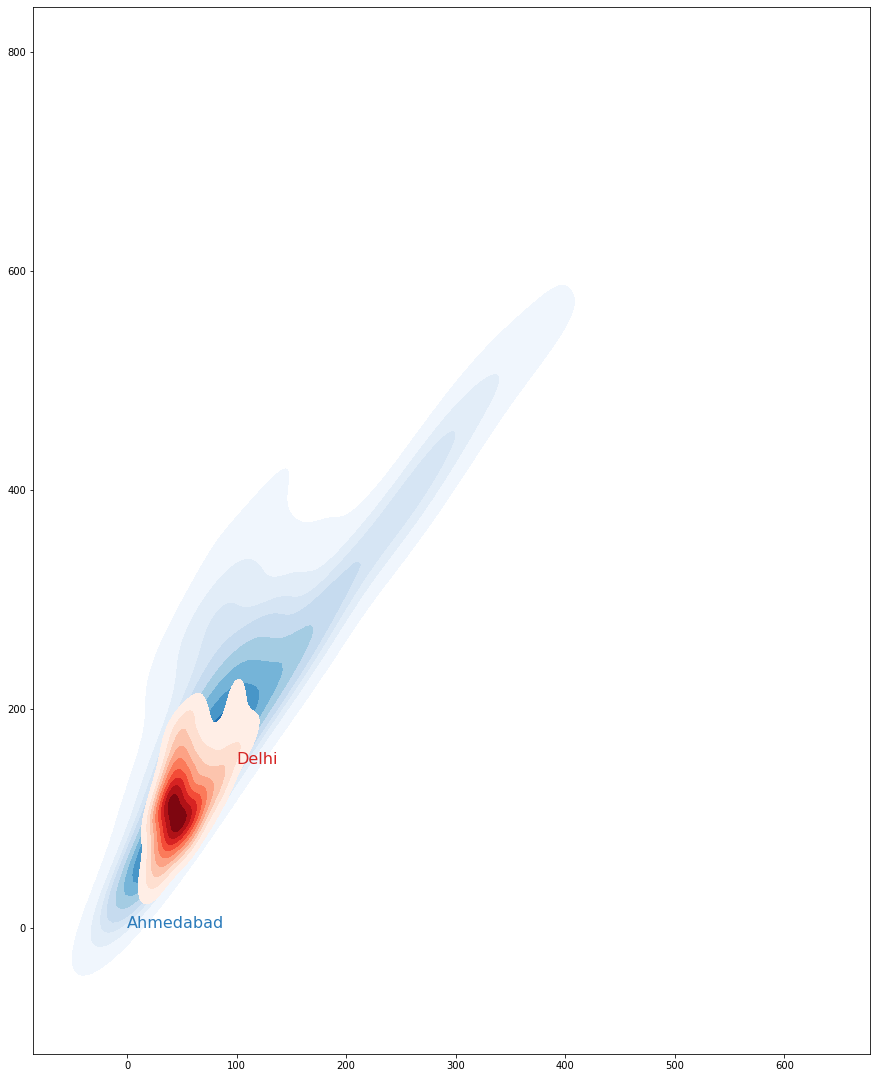

In [128]:
years=['2019']

for i in range(len(years)):
    year = years[i]  

    filter1 = df[(df['year'] == year)]

    #Ahmedabad
    filter2_city1 = filter1[(filter1['City'] == 'Ahmedabad') & (filter1['PM2.5']>0) & (filter1['PM10']>0)]
    values25_city1 = filter2_city1['PM2.5'].tolist()
    values10_city1 = filter2_city1['PM10'].tolist()                                                                     
        
    #Delhi    
    filter2_city2 = filter1[(filter1['City'] == 'Delhi') & (filter1['PM2.5']>0) & (filter1['PM10']>0)]
    values25_city2 = filter2_city2['PM2.5'].tolist()
    values10_city2 = filter2_city2['PM10'].tolist()    


    # definisanje veličine prikaza plota
    f, ax = plt.subplots(figsize=(15, 25))
    ax.set_aspect("equal")
    
    # crtanje plotova    
    ax = sns.kdeplot(x=values25_city2, y=values10_city2, cmap="Blues", shade=True, thresh=0.05)
    ax = sns.kdeplot(x=values25_city1, y=values10_city1, cmap="Reds", shade=True, thresh=0.05)
    # dodavanje labela
    red = sns.color_palette("Reds")[-2]
    blue = sns.color_palette("Blues")[-2]
    ax.text(0, 0, "Ahmedabad", size=16, color=blue)
    ax.text(100, 150, "Delhi", size=16, color=red)